EXPLORATORY DATA ANALYSIS

1. Data Preparation

In [1]:
# libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets

application_data = pd.read_csv(r'C:\Users\nehas\Downloads\application_data.csv',encoding='cp1252')
previous_application = pd.read_csv(r'C:\Users\nehas\Downloads\previous_application.csv',encoding='cp1252')
columns_description = pd.read_csv(r'C:\Users\nehas\Downloads\columns_description.csv',encoding='cp1252')

In [3]:
# EXPLORING

# Check for missing values and data types
print("Application Data Info:")
print(application_data.info())

print("\nPrevious Application Data Info:")
print(previous_application.info())

# Statistical summary
print("\nApplication Data Description:")
print(application_data.describe())

Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Previous Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_

In [4]:
print("\nShape of Application Data:", application_data.shape)
print("Shape of Previous Application Data:", previous_application.shape)


Shape of Application Data: (307511, 122)
Shape of Previous Application Data: (1670214, 37)


In [6]:
# Check the summary for the numeric column
application_data.describe(include = 'all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

2. Handling Missing Data

In [8]:
missing_data=application_data.isnull().sum()
print(missing_data)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


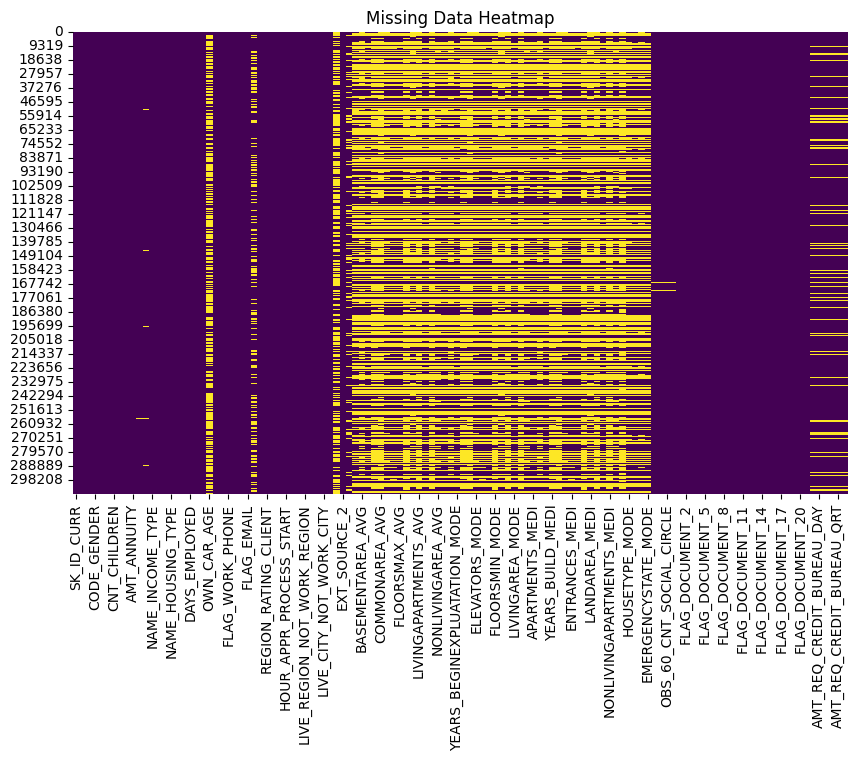

In [9]:
# Visualize missing data

plt.figure(figsize=(10, 6))
sns.heatmap(application_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [10]:
#Percentage of missing values in all columns 
null_count=round(100*(application_data.isnull().sum()/len(application_data.index)),2)
null_count

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [12]:
# columns with high missing percentage i.e >=40%
null_count = null_count[null_count>=40.00]
null_count

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [13]:
len(null_count)

49

In [16]:
# Removing the 49 columns having high percentage of null values
null_cols=([null_count[null_count >=40.00].index])
application_data.drop(labels=null_cols[0],axis=1,inplace=True)
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [17]:
application_data.shape

(307511, 73)

In [18]:
# Percentage of missing values after removing the above columns
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 73, dtype: float64

We can observe that still there are few more columns having considerably low percentange of null values. However we also need to look at the usefulness of these columns in order to get the correct insights from the data. Let's first remove the unwanted columns from the data for more effective analysis.

In [22]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_data.drop(labels=unwanted,axis=1,inplace=True)

In [23]:
application_data.shape

(307511, 43)

In [24]:
# Percentage of missing values after removing the unwanted columns
100*(application_data.isnull().sum()/len(application_data.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

We see that the column 'AMT_ANNUITY' has the lowest percentage of null values i.e. 0.003902 which can be imputed in this case. However let's check the outliers in order find out which value to be imputed i.e. mean or median.

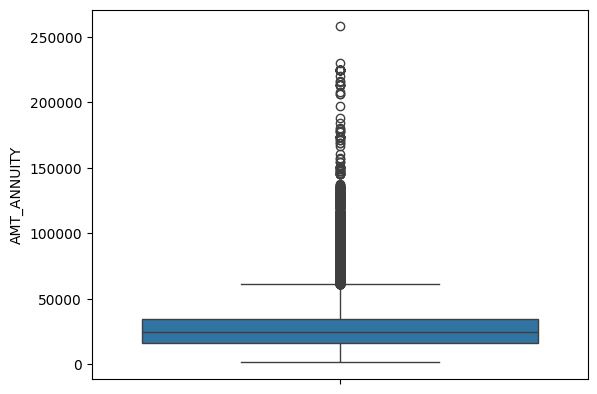

In [26]:
# Let's plot a boxplot to get the outliers

sns.boxplot(application_data.AMT_ANNUITY);

We can observe that this column has an outlier which is very large imputing with average would not be appropriate in this case hence let's impute the missing values with median.

In [28]:
# Filling missing values with median

med_value=application_data['AMT_ANNUITY'].median()
application_data.loc[application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=med_value

In [29]:
application_data.AMT_ANNUITY.isnull().sum()

0

Column 'AMT_GOODS_PRICE' has lower percentage of null values i.e. 0.09 which can be imputed in this case. However let's check the outliers in order find out which value to be imputed i.e. mean or median.

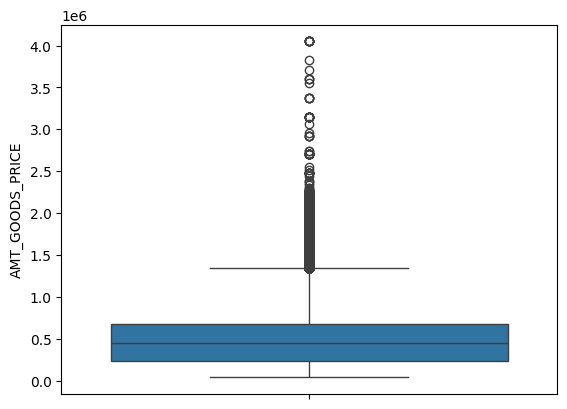

In [31]:
# boxplot to get the outliers

sns.boxplot(application_data.AMT_GOODS_PRICE);

In [32]:
med_value1 = application_data['AMT_GOODS_PRICE'].median()

In [33]:
application_data.loc[application_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']= med_value1
application_data.AMT_GOODS_PRICE.isnull().sum()

0

In [34]:
# Checking the values of NAME_TYPE_SUITE to check the categorical values 
application_data.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

Column 'NAME_TYPE_SUITE' has lower percentage of null values i.e. 0.42% which can be imputed in this case. As the values are categorical, lets impute the missing value by using the dataset indicating Unaccompanied

In [36]:
application_data.loc[application_data['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE']= 'Unaccompanied'
application_data.NAME_TYPE_SUITE.isnull().sum()

0

In [37]:
# Checking the values of OCCUPATION_TYPE to check the categorical values 
application_data.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Column 'OCCUPATION_TYPE' has higher percentage of null values and any update of value to handle missing values is going to skew analysis by a large margin. We cannot drop the records for the same reason as well. As the values are categorical, lets impute the missing value by identifying the missing values by a new categorical variable as 'Not Available' which also will get an idea on data sanity in analysis

In [39]:
application_data.loc[application_data['OCCUPATION_TYPE'].isnull(),'OCCUPATION_TYPE']= 'Not Available'
application_data.OCCUPATION_TYPE.isnull().sum()

0

In [40]:
# Checking the values of OCCUPATION_TYPE to check the categorical values 
application_data.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Not Available            96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [41]:
# Checking the values of CODE_GENDER to check the categorical values 
application_data.CODE_GENDER.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [42]:
# Checking the values of CNT_CHILDREN  to check the categorical values 
application_data.CNT_CHILDREN.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis


CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [43]:
# Checking the values of NAME_EDUCATION_TYPE to check the categorical values 
application_data.NAME_EDUCATION_TYPE.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [44]:
# Checking the values of NAME_CONTRACT_TYPE to check the categorical values 
application_data.NAME_CONTRACT_TYPE.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [45]:
# Checking the values of FLAG_OWN_CAR to check the categorical values 
application_data.FLAG_OWN_CAR.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [46]:
# Checking the values of FLAG_OWN_REALTY to check the categorical values 
application_data.FLAG_OWN_REALTY.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

We have variables 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY'to analyze if ownership of assets has any significance in credit analysis. We are adding one more variable to check if both car and realty are owned. We feel it would also be a good indicator if a client is in ownership of both car and house to give a more holistic analysis

In [48]:
application_data['FLAG_ASSETS'] = 0

In [49]:
application_data.loc[(application_data['FLAG_OWN_CAR'] == 'Y') & (application_data['FLAG_OWN_REALTY'] == 'Y'), 'FLAG_ASSETS'] = 1 

In [50]:
application_data.FLAG_ASSETS.value_counts()

FLAG_ASSETS
0    235151
1     72360
Name: count, dtype: int64

In [51]:
# Checking the values ofNAME_FAMILY_STATUS  to check the categorical values 
application_data.NAME_FAMILY_STATUS.value_counts()

# Values are gauzed to check if available categorical values are ready for analysis

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Standardization of day field in DAYS_BIRTH to derive a commonly accepted data metric i.e, years (not days), roudning of age value and getting absolute value to alter negative integer to positive

In [53]:
application_data['DAYS_BIRTH'] = round(application_data['DAYS_BIRTH']/365)
application_data['DAYS_BIRTH'] = application_data.DAYS_BIRTH.apply(lambda x: abs(x))
application_data.DAYS_BIRTH.value_counts()

DAYS_BIRTH
39.0    9023
38.0    8793
37.0    8727
40.0    8602
41.0    8495
28.0    8467
32.0    8313
42.0    8308
43.0    8265
36.0    8152
44.0    8132
31.0    8021
30.0    7776
35.0    7751
33.0    7729
34.0    7659
29.0    7636
54.0    7489
45.0    7385
46.0    7333
47.0    7202
55.0    7140
53.0    7124
57.0    6926
48.0    6907
49.0    6786
52.0    6740
50.0    6696
56.0    6657
60.0    6612
59.0    6479
51.0    6417
27.0    6413
58.0    6371
61.0    5795
63.0    5467
62.0    5362
64.0    5023
26.0    4364
65.0    4318
25.0    4079
24.0    3815
23.0    3669
66.0    2641
22.0    1990
67.0    1834
68.0    1654
21.0     660
69.0     314
Name: count, dtype: int64

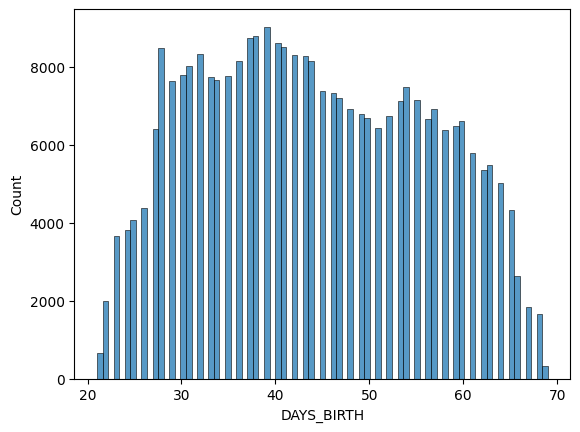

In [54]:
#plotting histogram to check the values in column DAYS_BIRTH
sns.histplot(application_data.DAYS_BIRTH);

Next step is to convert continous variable columns in datsets with bins for better analysis for columns 'AMT_INCOME_TOTAL'

In [56]:
# Creating bins for AMT_INCOME_TOTAL
#Binning is performed by creating ranges and slots for ranges at bins of 25000 each

labels = ['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-120000','120000-140000','140000-160000',
          '160000-180000','180000-200000','200000-220000','220000-240000','240000-260000','260000-280000','280000-300000','300000 and above']
bins = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,240000,260000,280000,300000,500000]

application_data['RANGE_INCOME']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=labels)

In [57]:

#Validating if binning is performed appropriately or not
application_data.RANGE_INCOME.value_counts()

RANGE_INCOME
120000-140000       47038
100000-120000       39639
80000-100000        36335
140000-160000       32752
160000-180000       32457
220000-240000       22652
300000 and above    20037
200000-220000       19667
60000-80000         18811
260000-280000       11950
40000-60000          7589
240000-260000        6890
280000-300000        4017
180000-200000        4012
20000-40000           963
0-20000                 0
Name: count, dtype: int64

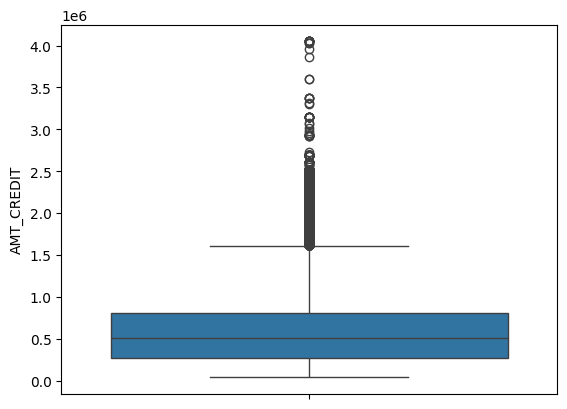

In [58]:
sns.boxplot(application_data.AMT_CREDIT);

In [59]:
# Creating bins for AMT_CREDIT
#Binning is performed by creating ranges and slots and converting a continous variable into categorical variable

labels = ['Very low','Low','Medium','High','Very High']
bins = [0,100000,200000,300000,400000,500000]

application_data['RANGE_AMT_CREDIT']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=labels)

In [60]:
application_data.RANGE_AMT_CREDIT.value_counts()

RANGE_AMT_CREDIT
Medium       54813
Very High    32038
Low          30140
High         26338
Very low      6004
Name: count, dtype: int64

3. Outlier Detection

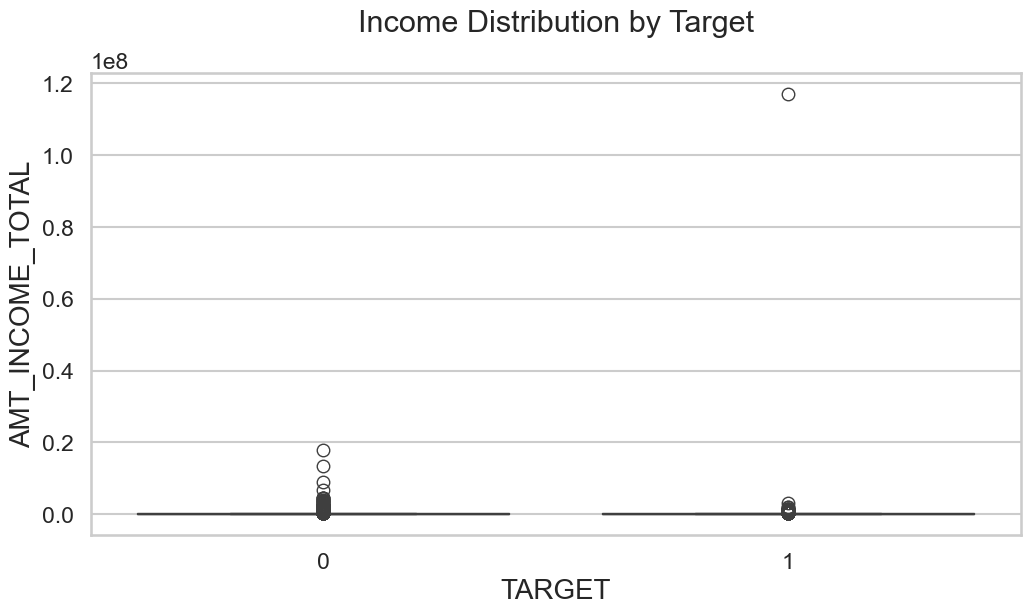

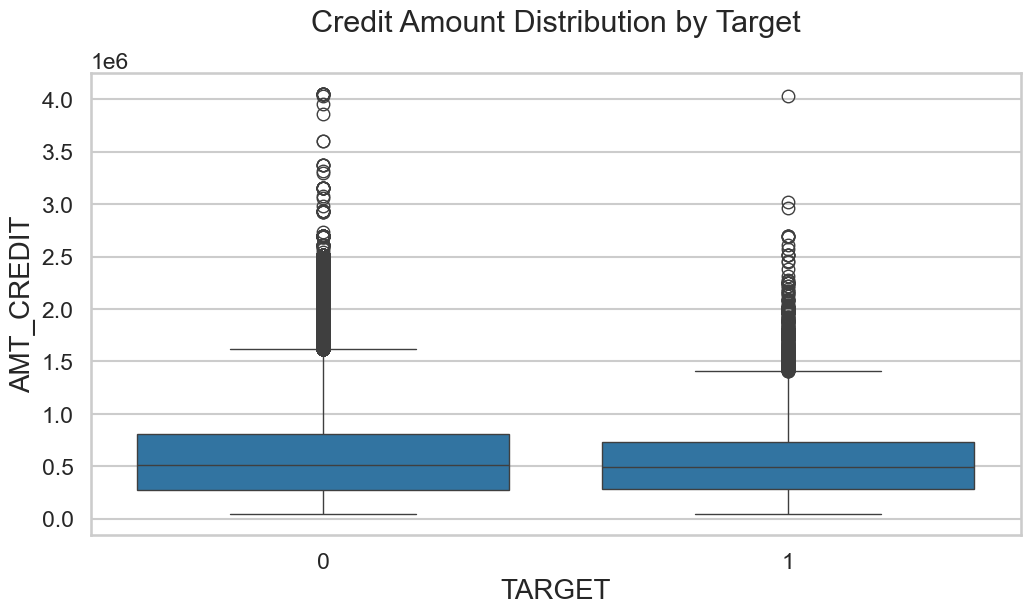

In [489]:
# Method 1: Boxplot by Target Variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=application_data)
plt.title('Income Distribution by Target')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=application_data)
plt.title('Credit Amount Distribution by Target')
plt.show()

4. Data Imbalance Analysis

In [72]:
application_data.RANGE_AMT_CREDIT.value_counts()

RANGE_AMT_CREDIT
Medium       54813
Very High    32038
Low          30140
High         26338
Very low      6004
Name: count, dtype: int64

In [76]:
#Validating values for target field
application_data.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [92]:
# Check for data imbalance in the target variable
# Dividing the dataset into two datasets of  target=1(client with payment difficulties) and target=0(all other)
# 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
# 0 - - all other cases

df_target_0=application_data.loc[application_data["TARGET"]==0]
df_target_1=application_data.loc[application_data["TARGET"]==1]


Imbalance Ratio: It designates the classification problem wherein observations per class/category is not equally distributed and is skewed towards one of the class variables. Calculating the imbalance ratio for target variable

In [101]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

Imbalance_ratio = round(len(df_target_0)/len(df_target_1),2)
Imbalance_ratio 

11.39

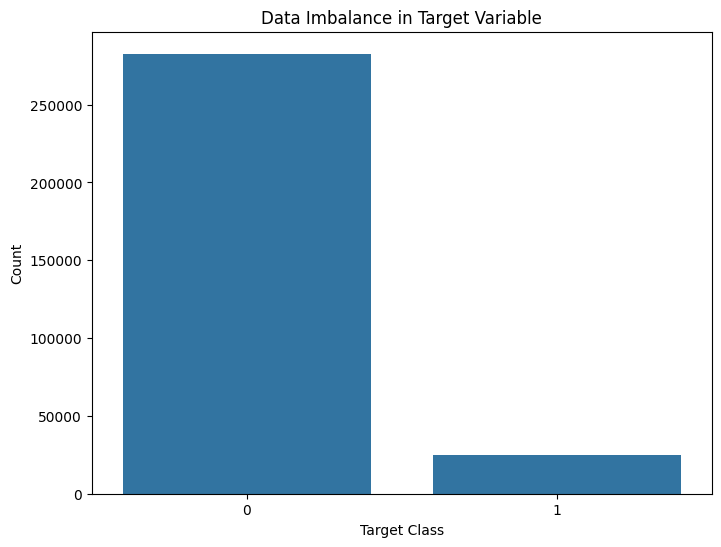

In [102]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=application_data)
plt.title('Data Imbalance in Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


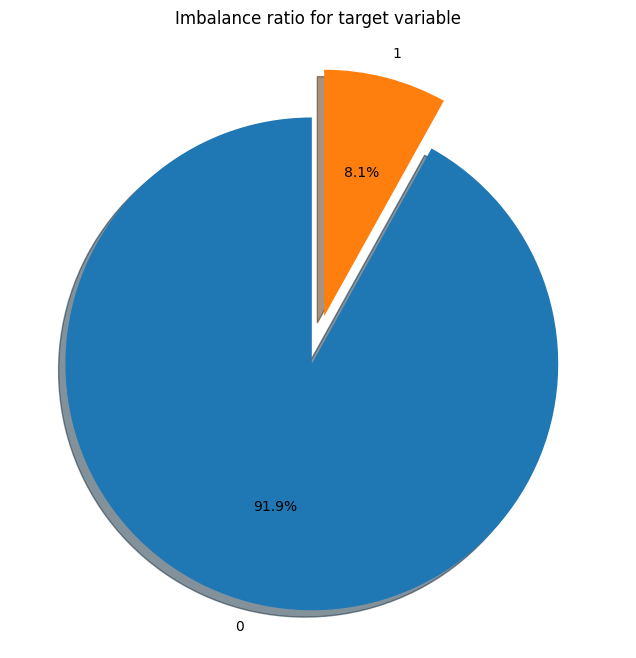

In [108]:
#Plotting imbalance ratio

# Assuming 'TARGET' is the column name in your DataFrame 'application_data'
target_counts = application_data["TARGET"].value_counts()

# Plotting
explode = (0.1, 0.1)
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
labels = ['0', '1']
axes.title.set_text('Imbalance ratio for target variable')
axes.pie(target_counts, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()


5. Exploratory Data Analysis (EDA)

   5.1) Univariate Analysis

a) Analysis of Contract type w.r.t. Target Variable across both data sets

In [116]:
# Plotting Contract type w.r.t both datasets for Target variable
explode = (0.1, 0)
colors = ['#008fd5', '#fc4f30']
data0 = df_target_0["NAME_CONTRACT_TYPE"].value_counts()

data1 = df_target_1["NAME_CONTRACT_TYPE"].value_counts()

labels = ['Cash loans','Revolving loans']

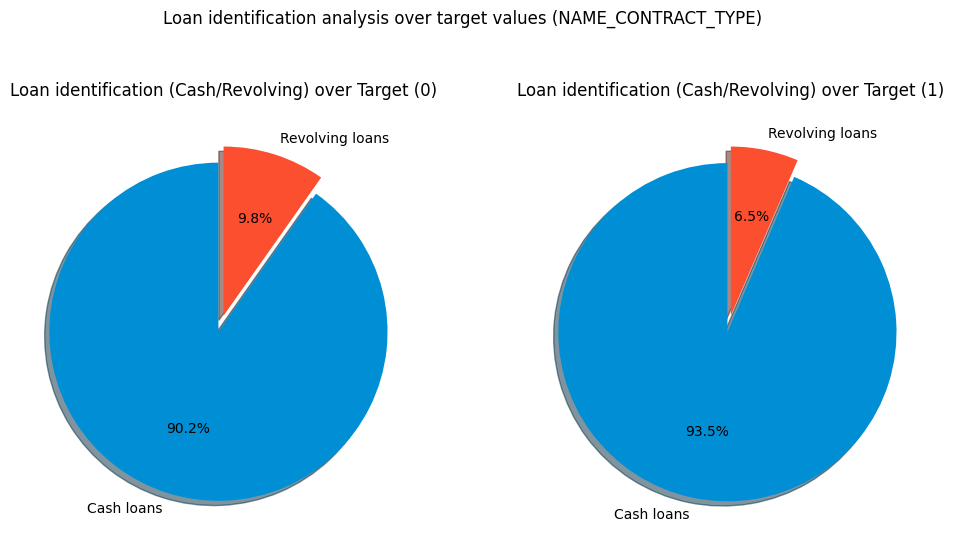

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 12))

ax1.title.set_text('Loan identification (Cash/Revolving) over Target (0)')
ax1.pie(data0, labels = labels ,colors = colors, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

ax2.title.set_text('Loan identification (Cash/Revolving) over Target (1)')
ax2.pie(data1, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)
fig.suptitle('Loan identification analysis over target values (NAME_CONTRACT_TYPE)', y=0.75)

plt.show()

Analysis inference points for Univariate analysis over NAME_CONTRACT_TYPE:

>Cash loans are the majority in both categories, making up 90.2% of non-defaulted loans and 93.5% of defaulted loans.>>The higher percentage of revolving loans in the non-defaulted category suggests that these loans are less likely to default compared to cash loans.
>>>The decrease in the proportion of revolving loans in the defaulted category (from 9.8% to 6.5%) may indicate that revolving loans are associated with better repayment behavior or lower default risk.


 Conclusion:

>Risk Assessment: Revolving loans might be considered less risky, while cash loans dominate in both categories but represent a slightly higher risk of default based on the relative proportions.

b) Analysis of Gender w.r.t. Target Variable across both data sets


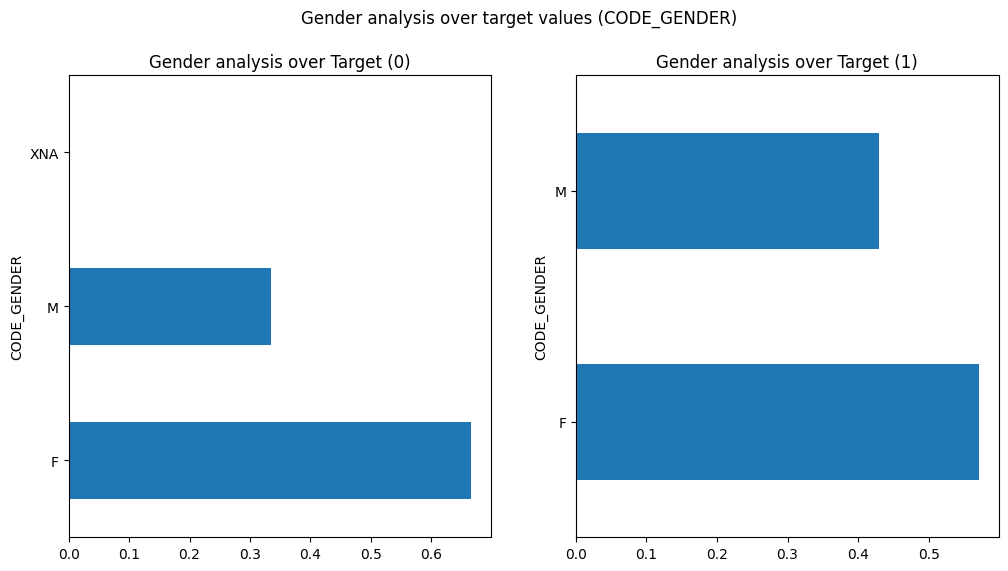

In [132]:
# Plotting COntract type w.r.t both datasets for Target variable
#fig, axes = plt.subplots(2, 1, figsize = (10, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

fig.suptitle('Gender analysis over target values (CODE_GENDER)', y=0.99)
ax1.title.set_text('Gender analysis over Target (0)')
df_target_0.CODE_GENDER.value_counts(normalize = True).plot.barh(ax=ax1)


ax2.title.set_text('Gender analysis over Target (1)')
df_target_1.CODE_GENDER.value_counts(normalize = True).plot.barh(ax=ax2)

plt.show()

Analysis inference points for Univariate analysis over Gender (CODE_GENDER):



>>Ratio of female customers over male customers heavily skew in favor of better payment of loans as males has relatively higher percentage of defaulters than females

c) Analysis of Assets w.r.t. Target Variable across both data sets
>FLAG_OWN_CAR: Flag if the client owns a car
>>FLAG_OWN_REALTY: Flag if client owns a house or flat
>>>FLAG_ASSETS: Boolean if client owns both car and house/flat

In [135]:
# Plotting FLAG_OWN_CAR w.r.t both datasets for Target variable
explode = (0.1, 0)
colors = ['#DFFF00', '#40E0D0']
car0 = df_target_0["FLAG_OWN_CAR"].value_counts()
car1 = df_target_1["FLAG_OWN_CAR"].value_counts()
house0 = df_target_0["FLAG_OWN_REALTY"].value_counts()
house1 = df_target_1["FLAG_OWN_REALTY"].value_counts()
assets0 = df_target_0["FLAG_ASSETS"].value_counts()
assets1 = df_target_1["FLAG_ASSETS"].value_counts()

labels = ['Y','N']

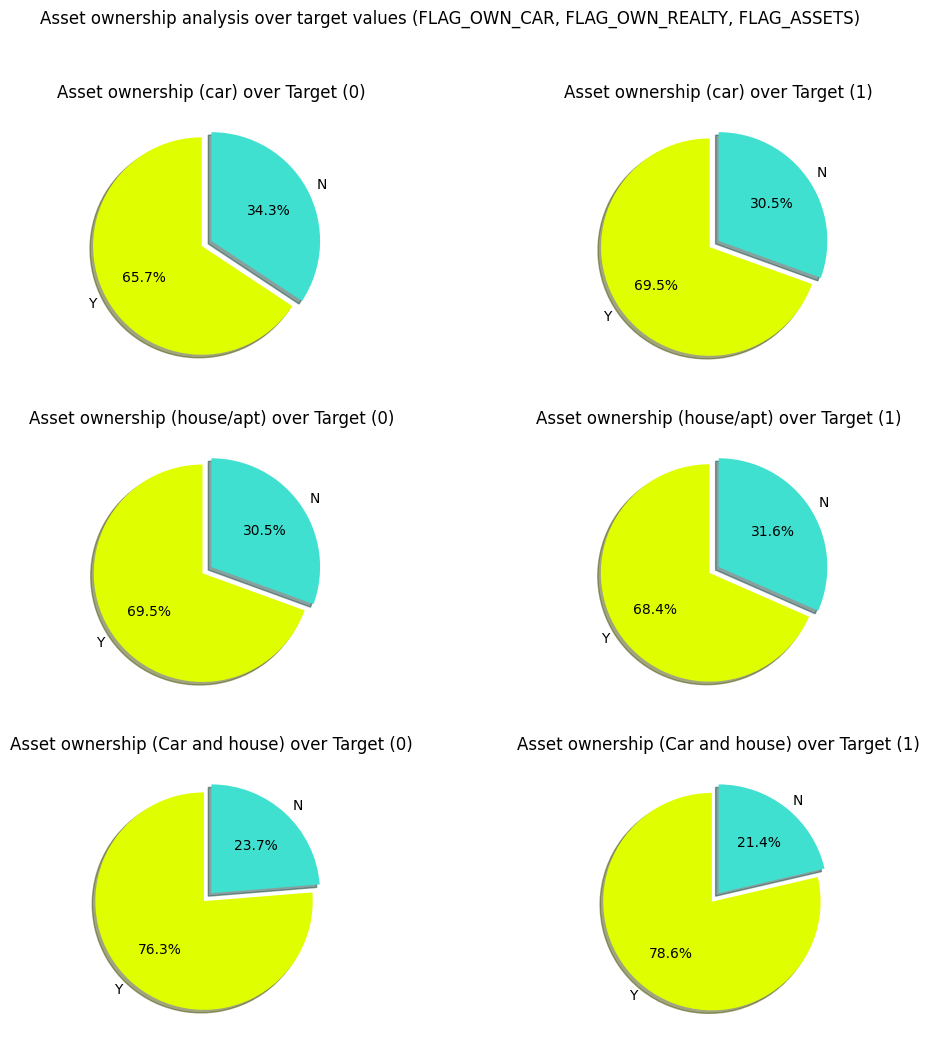

In [137]:
# Plotting COntract type w.r.t both datasets for Target variable
fig, axes = plt.subplots(3, 2, figsize = (12, 12))

fig.suptitle('Asset ownership analysis over target values (FLAG_OWN_CAR, FLAG_OWN_REALTY, FLAG_ASSETS)', y=0.96)

axes[0][0].title.set_text('Asset ownership (car) over Target (0)')
axes[0][0].pie(car0,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

axes[0][1].title.set_text('Asset ownership (car) over Target (1)')
axes[0][1].pie(car1,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

axes[1][0].title.set_text('Asset ownership (house/apt) over Target (0)')
axes[1][0].pie(house0,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

axes[1][1].title.set_text('Asset ownership (house/apt) over Target (1)')
axes[1][1].pie(house1,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)


axes[2][0].title.set_text('Asset ownership (Car and house) over Target (0)')
axes[2][0].pie(assets0,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

axes[2][1].title.set_text('Asset ownership (Car and house) over Target (1)')
axes[2][1].pie(assets1,colors = colors, labels = labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle = 90)

plt.show()

Analysis inference points for Univariate analysis over Assets ownership :

>>Data metric is very close in each variable across car ownership, house ownership and ownership of both>>
Data is slightly skewed towards following inference that clients who own car are less likely to repay loans clients who own house are more likely to repay loan clients who own both house and car are less likely to repay loans However, since the data metric is too close and very slightly skewed, we cannot confirm these inferences and we will not uses this metric for any conclusion

d) Analysis of Income type w.r.t. Target Variable across both data sets


In [141]:
# Plotting Income type w.r.t both datasets for Target variable

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

fig.suptitle('Income type over target values (CODE_GENDER)', y=0.99)
ax1.title.set_text('Income type analysis over Target (0)')
df_target_0.NAME_INCOME_TYPE.value_counts(normalize = True).plot.barh(ax=ax1)


ax2.title.set_text('Income type analysis over Target (1)')
df_target_1.NAME_INCOME_TYPE.value_counts(normalize = True).plot.barh(ax=ax2)
fig.tight_layout()
plt.show()

Analysis inference points for Univariate analysis overIncome Type :

>Pensioners are more likely to pay the loans

e) Analysis of Education type w.r.t. Target Variable across both data sets


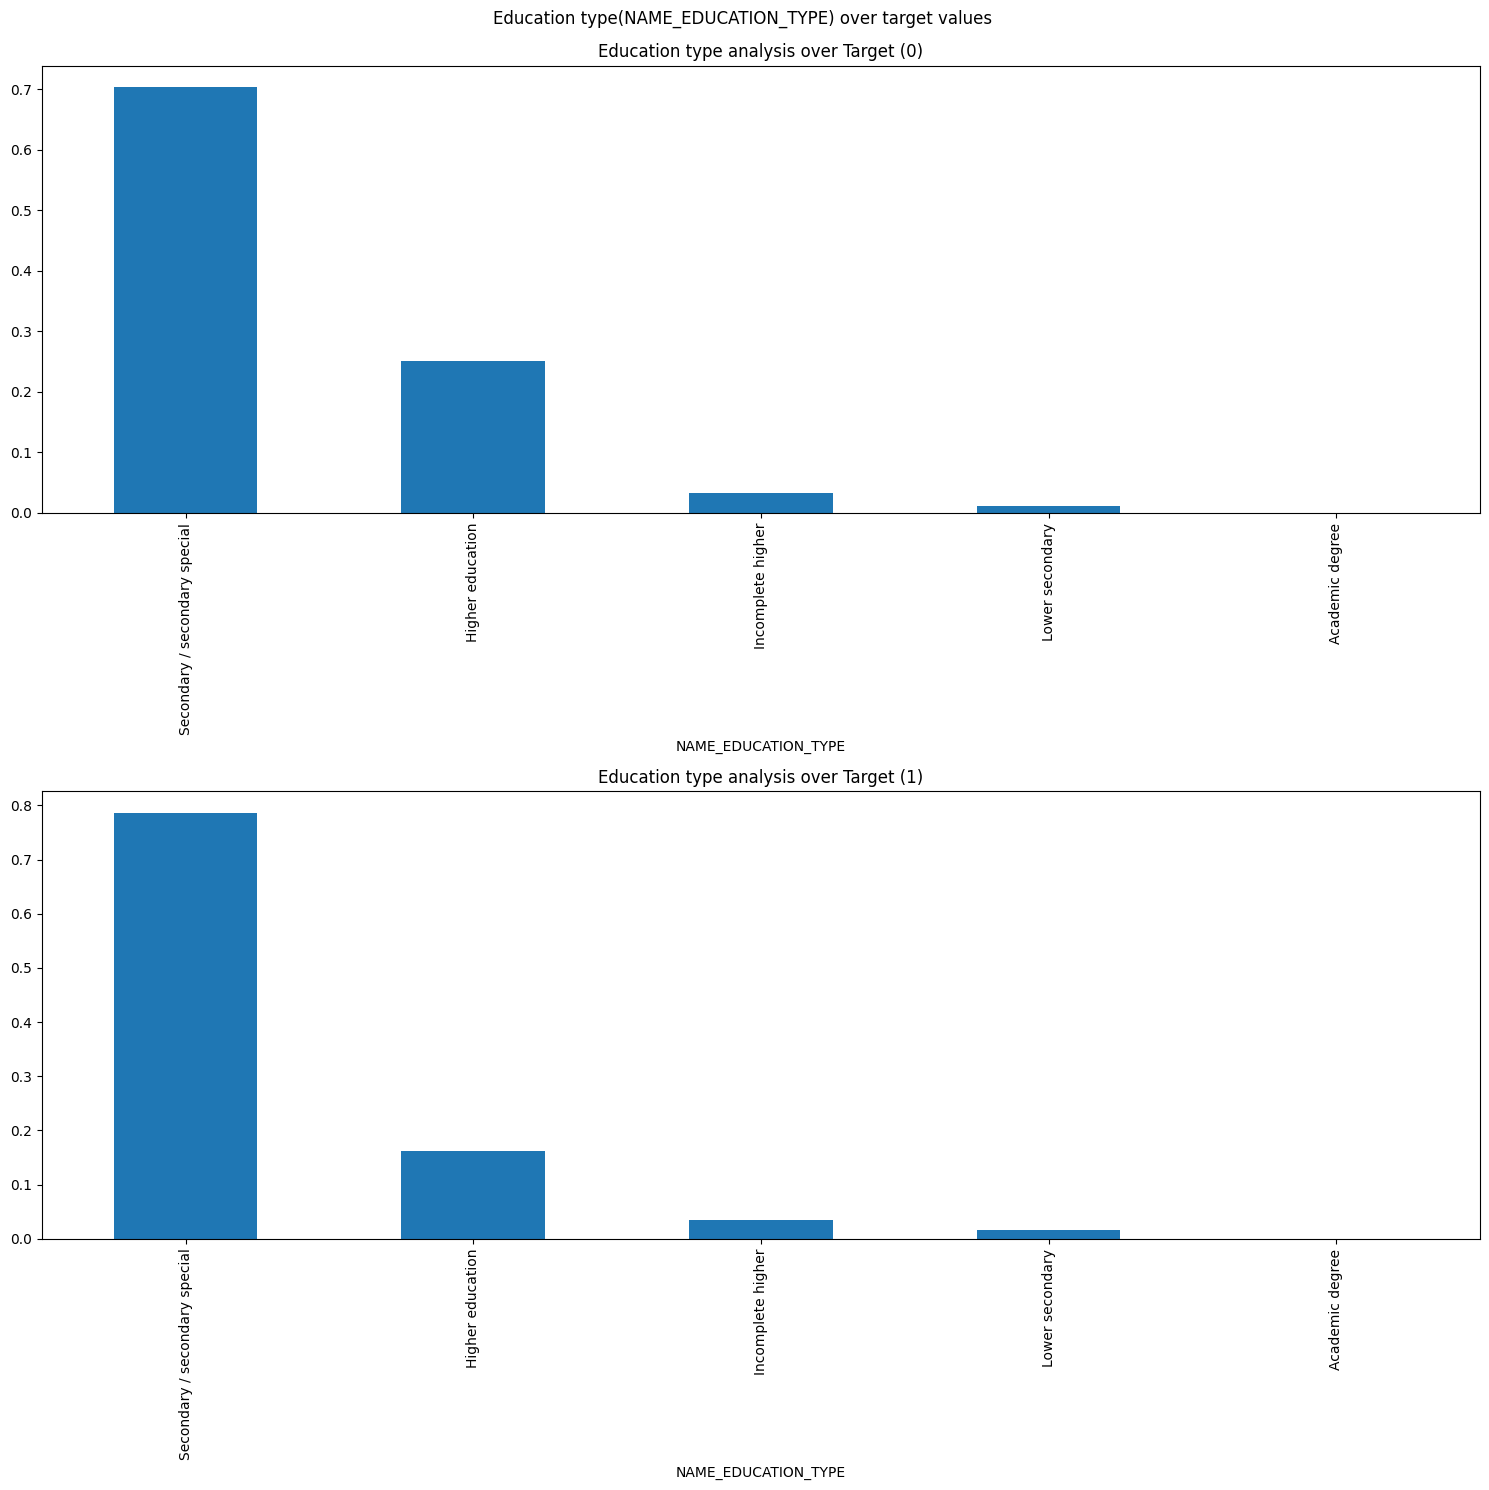

In [146]:
# Plotting Education type w.r.t both datasets for Target variable

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (15, 15))

fig.suptitle('Education type(NAME_EDUCATION_TYPE) over target values ', y=0.99)
ax1.title.set_text('Education type analysis over Target (0)')
df_target_0.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax1)
ax2.title.set_text('Education type analysis over Target (1)')
df_target_1.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax2)
fig.tight_layout()
plt.show()

Analysis inference for univariate analysis over education type
>Clients with Secondary education are more likely to apply for loans
>>Clients with secondary education are more likely to default loans
>>>Clients with higher education are more likely to repay loans

f) Analysis of Family status w.r.t. Target Variable across both data sets


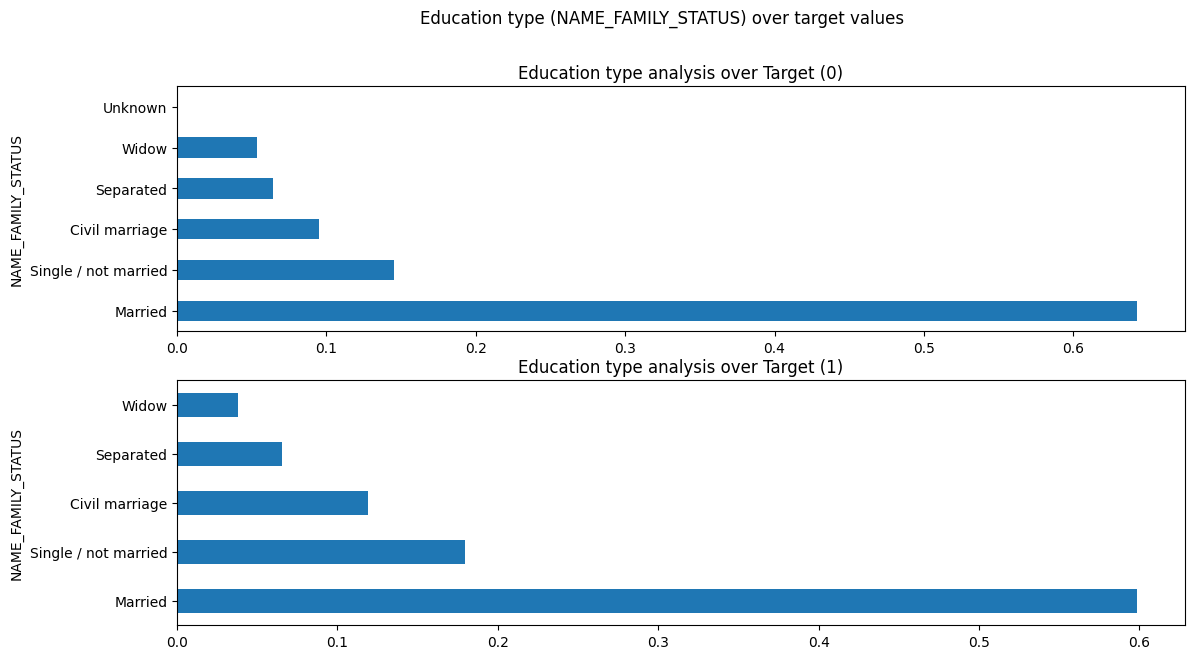

In [152]:
# Plotting Income type w.r.t both datasets for Target variable

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (13, 7))

fig.suptitle('Education type (NAME_FAMILY_STATUS) over target values ', y=0.99)
ax1.title.set_text('Education type analysis over Target (0)')
df_target_0.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh(ax=ax1)


ax2.title.set_text('Education type analysis over Target (1)')
df_target_1.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh(ax=ax2)

plt.show()

Analysis inference for univariate analysis over family status
>Married clients are most likely to apply for loan
>>Single clients are most likely to default on loan payments
>>>Widow clients are more likely to repay loans

g) Analysis of age of clients w.r.t. Target Variable across both data sets


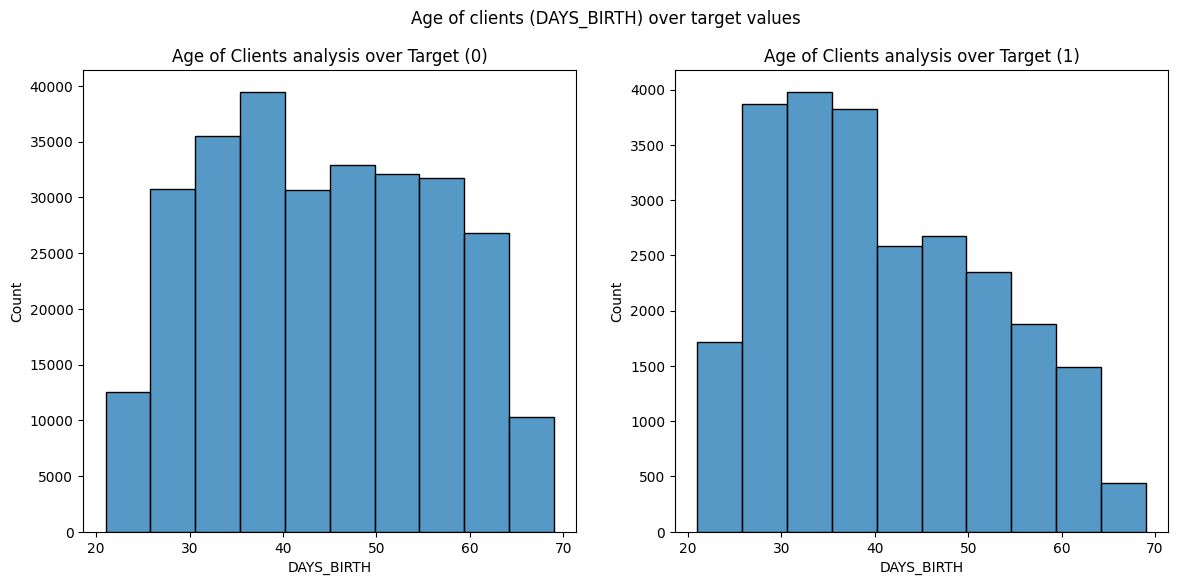

In [156]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14, 6))
fig.suptitle('Age of clients (DAYS_BIRTH) over target values ')

ax1.title.set_text('Age of Clients analysis over Target (0)')
sns.histplot(data= df_target_0, x="DAYS_BIRTH", bins = 10, ax = ax1)

ax2.title.set_text('Age of Clients analysis over Target (1)')
sns.histplot(data= df_target_1, x="DAYS_BIRTH", bins = 10, ax = ax2)
plt.show()

Analysis inference for univariate analysis over family status
>Older clients (greater than 40 yrs of age) are most likely to repay loans
>>Younger clients are most likley to default on loan payments

h) Analysis of Occupation w.r.t. Target Variable across both data sets


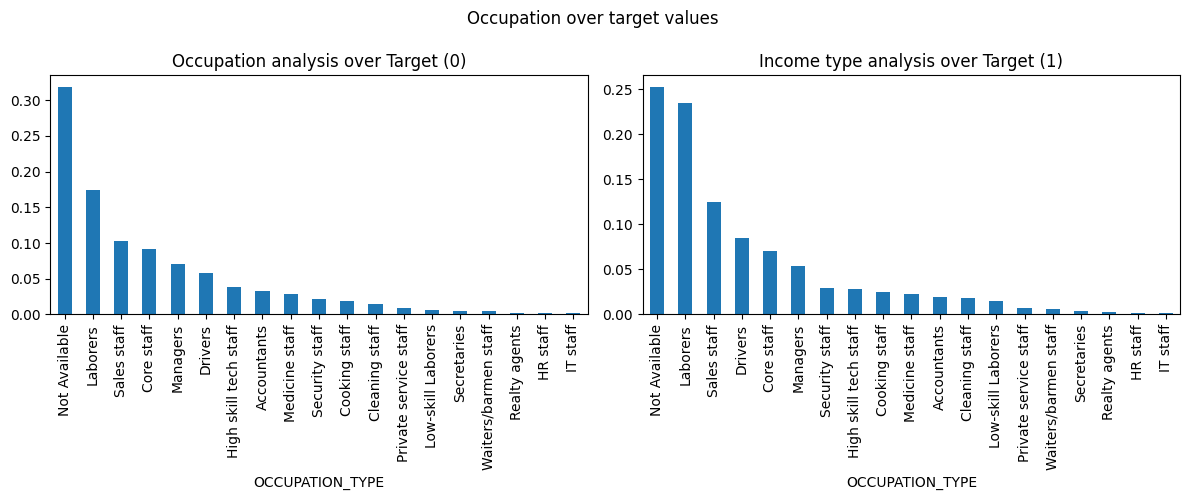

In [162]:
# Plotting Occupation w.r.t both datasets for Target variable

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

fig.suptitle('Occupation over target values ', y=0.99)
ax1.title.set_text('Occupation analysis over Target (0)')
df_target_0.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax1)


ax2.title.set_text('Income type analysis over Target (1)')
df_target_1.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax2)
fig.tight_layout()
plt.show()

Analysis inference for univariate analysis over occupation type
>Clients with occupation as laborers are most likely to default on loan payments
>>Sales staff are also most likely to default on payments
>>>HR and IT staff are less likely to apply for loan

i) Analysis of Income w.r.t. Target Variable across both data sets


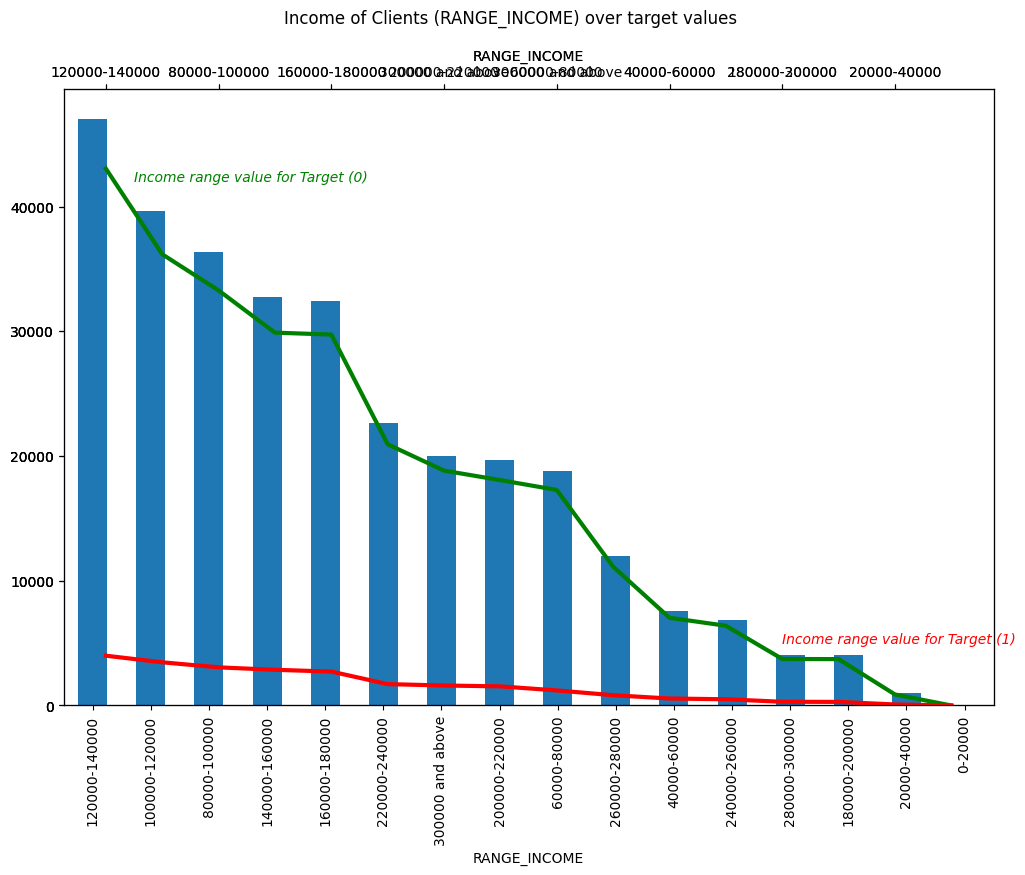

In [169]:
fig, axs = plt.subplots(1,1,figsize = (12, 8))
fig.suptitle('Income of Clients (RANGE_INCOME) over target values ')

#ax1.title.set_text('Income of Clients analysis over Target (0)')
#sns.histplot(data= df_target_0, x="RANGE_INCOME", ax = ax1)
application_data.RANGE_INCOME.value_counts().plot.bar(ax=axs)
#ax2.title.set_text('Income of Clients analysis over Target (1)')
ax2 = axs.twiny()
df_target_0.RANGE_INCOME.value_counts().plot(kind='line',color='green',linewidth = 3, ax=ax2)
ax2.text(0.5, 42000, 'Income range value for Target (0)', style='oblique', color = 'green', fontweight = 'medium')
ax3 = axs.twiny()
df_target_1.RANGE_INCOME.value_counts().plot(kind='line',color='red', linewidth = 3, ax=ax3)
ax2.text(12, 5000, 'Income range value for Target (1)', style='oblique', color = 'red', fontweight = 'medium')
#df.RANGE_INCOME.value_counts().plot.bar()
plt.show()

Analysis inference for univariate analysis over income range
>Clients with higher income range brackets greater than 240000 are most likely to repay the loans

>>Clients with moderate income range bracket i.e, b/w 80000 to 140000 are more likely to default loans

>>>Clients with low-income ranges are less likely to apply for loans

2) Bivariate Analysis

A) Bivariate analysis of Categorical v/s Categorical variables

In [174]:
df_plot = application_data.groupby(['NAME_EDUCATION_TYPE', 'RANGE_INCOME']).size().reset_index().pivot(columns='NAME_EDUCATION_TYPE', index='RANGE_INCOME', values=0)


C:\Users\nehas\AppData\Local\Temp\ipykernel_19932\3244705756.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = application_data.groupby(['NAME_EDUCATION_TYPE', 'RANGE_INCOME']).size().reset_index().pivot(columns='NAME_EDUCATION_TYPE', index='RANGE_INCOME', values=0)


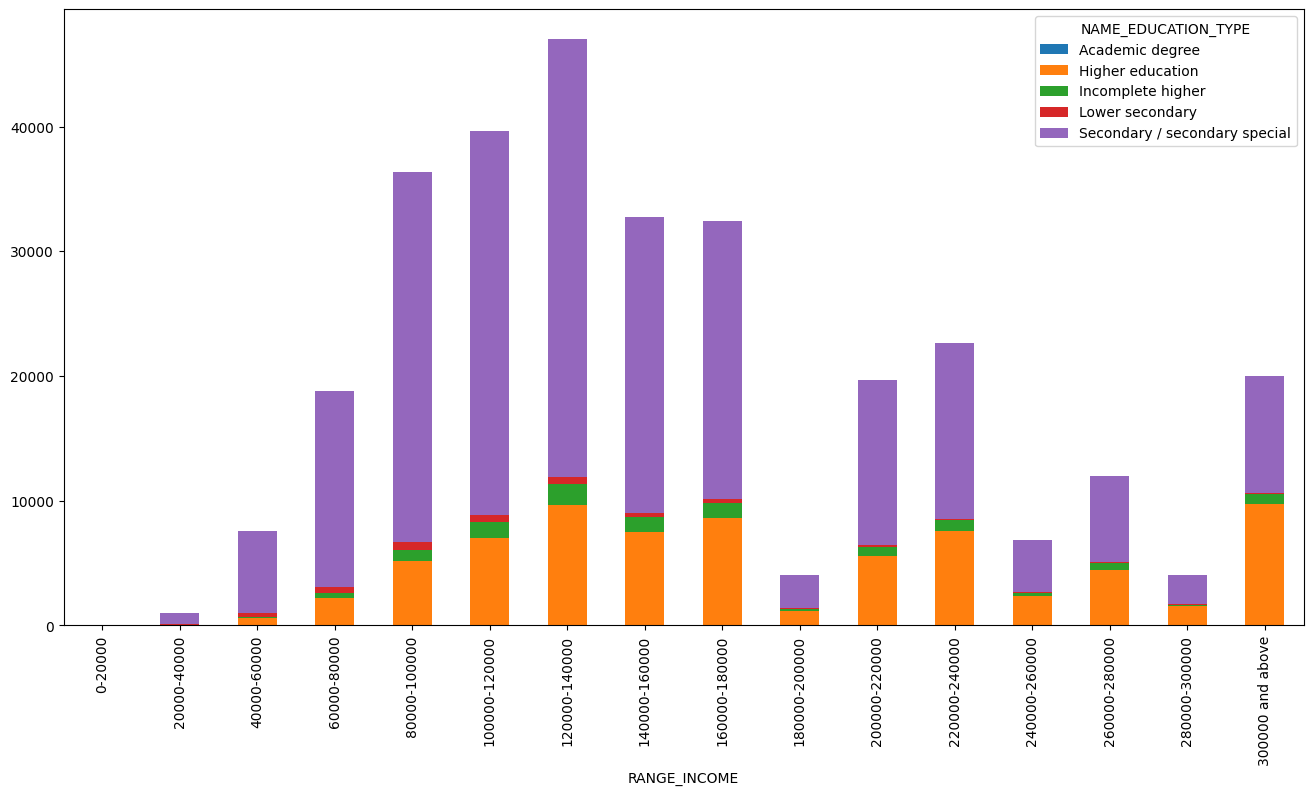

In [176]:
fig, axs = plt.subplots(1,1,figsize = (16, 8))
df_plot.plot(kind='bar', stacked=True,ax=axs)
plt.show()

Analysis inference for Bivariate analysis of education type w.r.t. income range
>Clients with low income ranges i.e., less than 80000 have very high percent of clients with secondary level education
>>Clients with mid income range have a balance of education with secondary and higher education
>>>Clients with high income range have relatively higher percent of higher education holders

B) Bivariate analysis of numerical v/s numerical variables

Income vs Credit, Goods price vs Credit

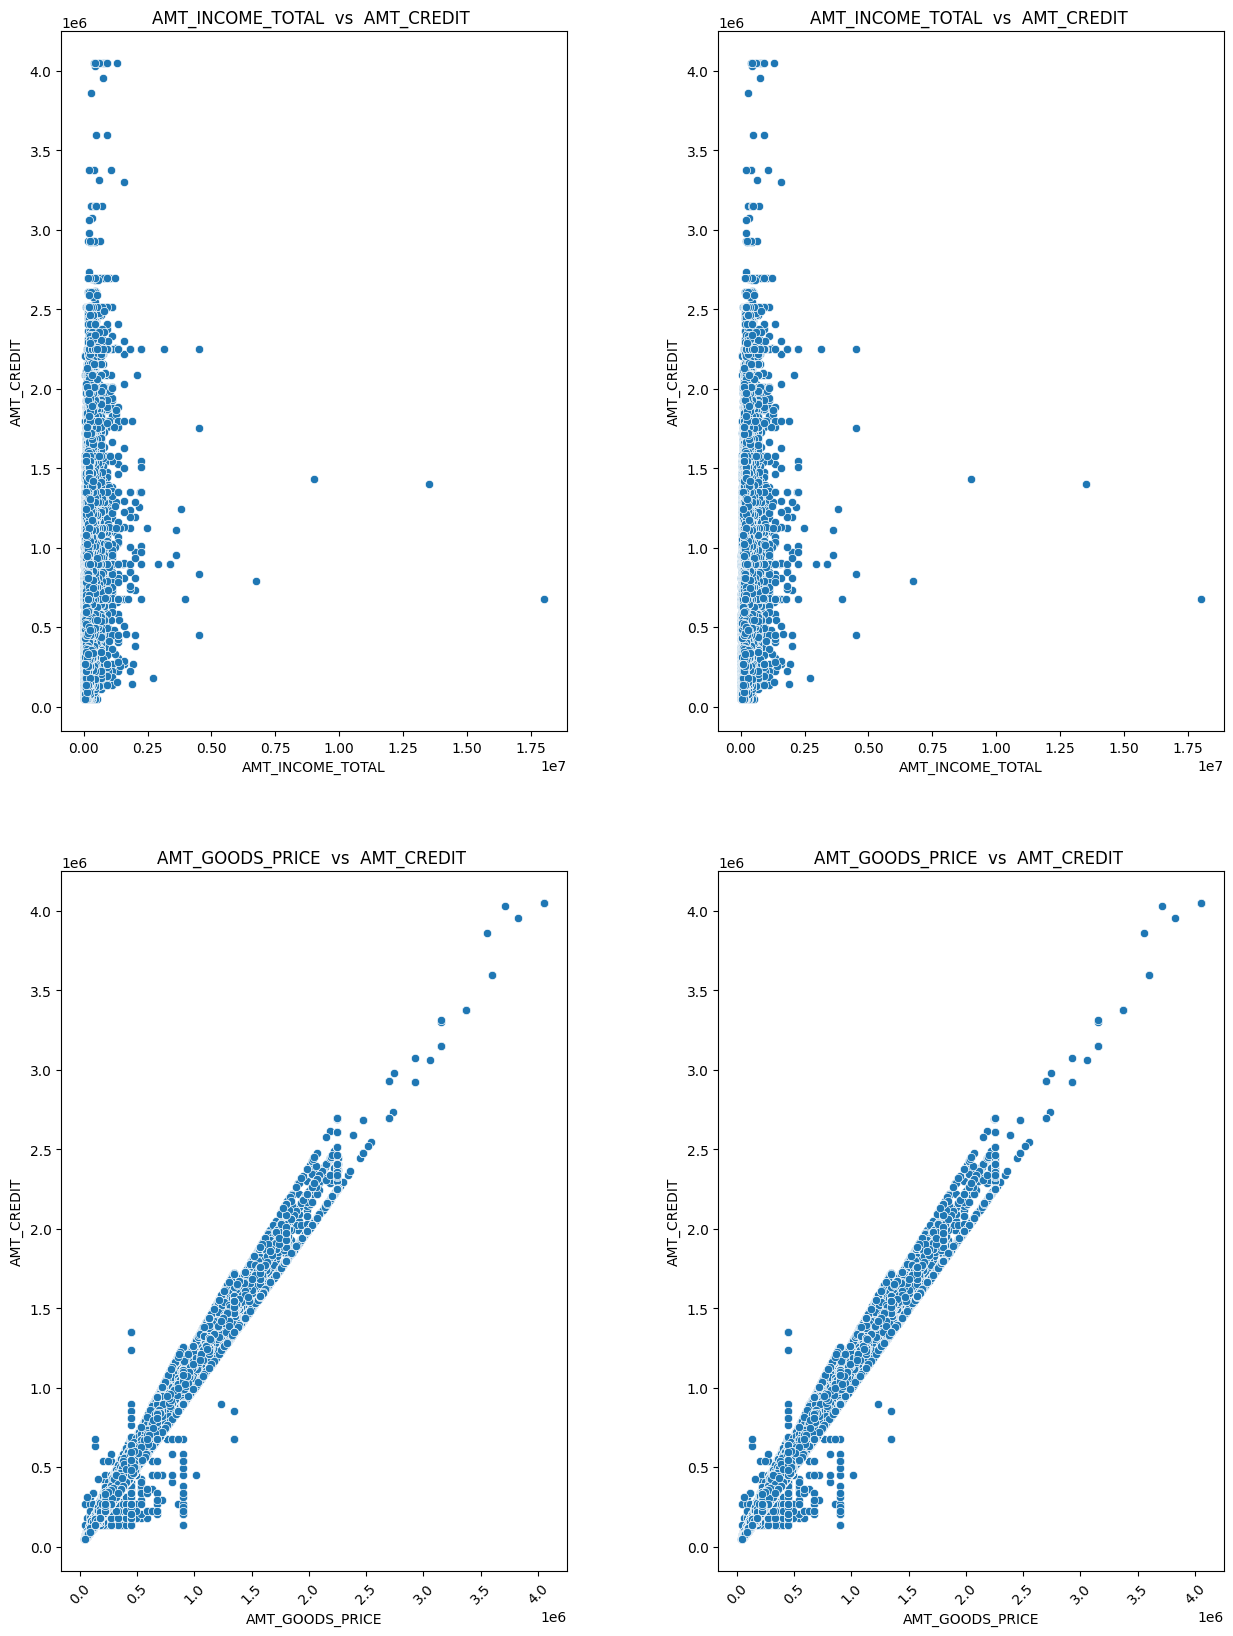

In [184]:
#Scatter plot for numeric columns
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,1)
sns.scatterplot(x=df_target_0.AMT_INCOME_TOTAL,y=df_target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(x=df_target_0.AMT_INCOME_TOTAL,y=df_target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(x=df_target_0.AMT_GOODS_PRICE,y=df_target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(x=df_target_0.AMT_GOODS_PRICE,y=df_target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()

Analysis inference for Bivariate analysis of income and credit amount>>
Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.

Analysis inference for Bivariate analysis of goods price and credit amount
>People who have higher goods price and have made payments on time have higher credits than those with higher goods price but didnt pay loan.

C) Numerical categorical analysis

Income range- Gender

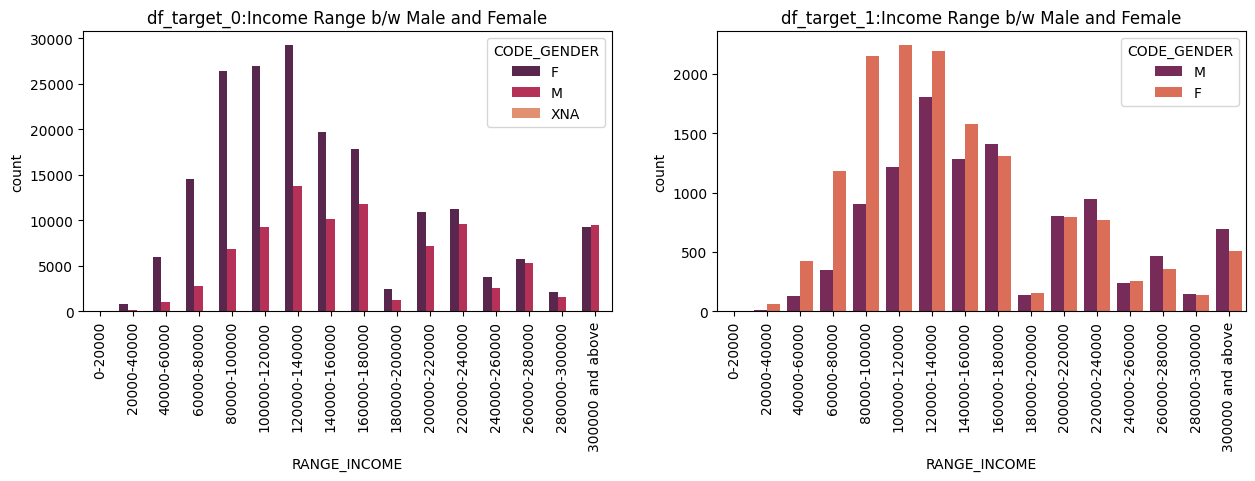

In [209]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('df_target_0:Income Range b/w Male and Female')
plt.xticks(rotation = 90)

sns.countplot(x='RANGE_INCOME', hue='CODE_GENDER', data=df_target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('df_target_1:Income Range b/w Male and Female')
plt.xticks(rotation = 90)

sns.countplot(x='RANGE_INCOME', hue='CODE_GENDER', data=df_target_1,palette='rocket')
plt.show()

We can observe that Females with income of upto 200000 don’t have any payment issues

Credit amount vs Education Status



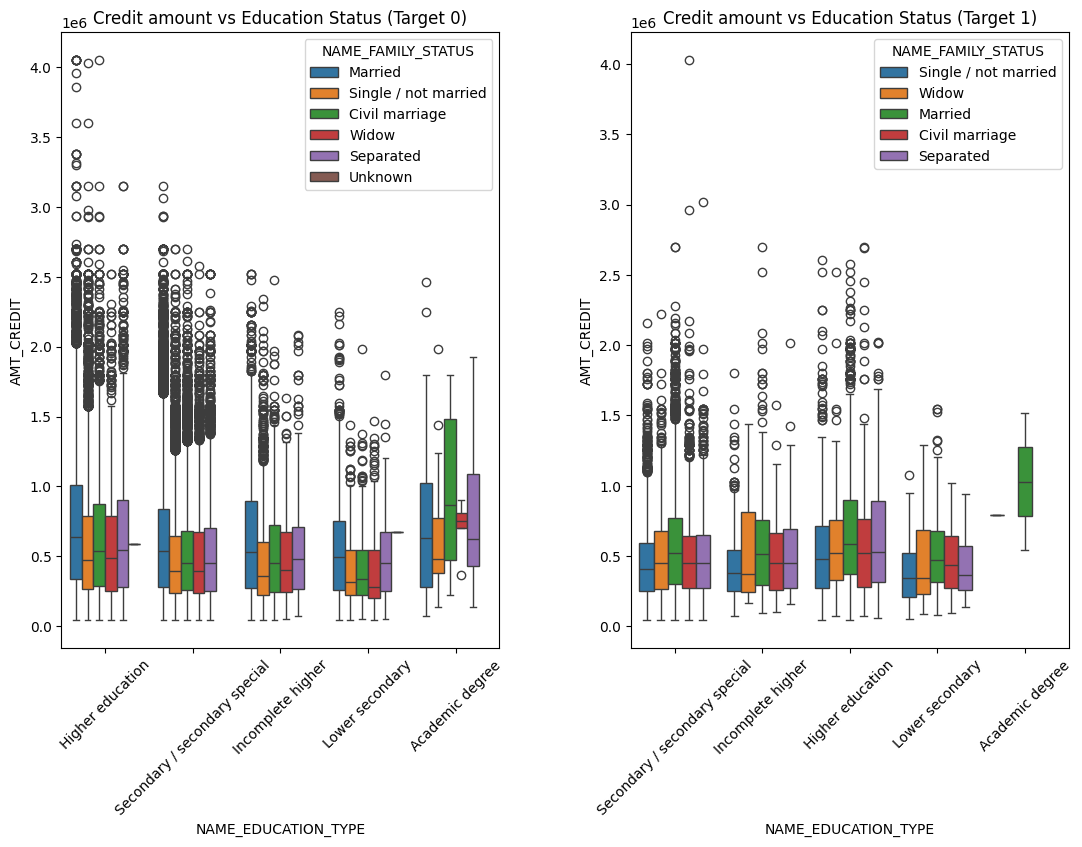

In [194]:
# Box plotting for Credit amount
plt.figure(figsize=(13,8))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =df_target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status (Target 0)')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =df_target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()

>Civil marriage for Academic degree is having most of the credits in the third quartile.
>>Some of the highly educated, married person are having credits higher than those who have done lower secondary eduction.
>>>Those with higher eduction have higher credits and are more likely to make payments on time

Income vs Education Status

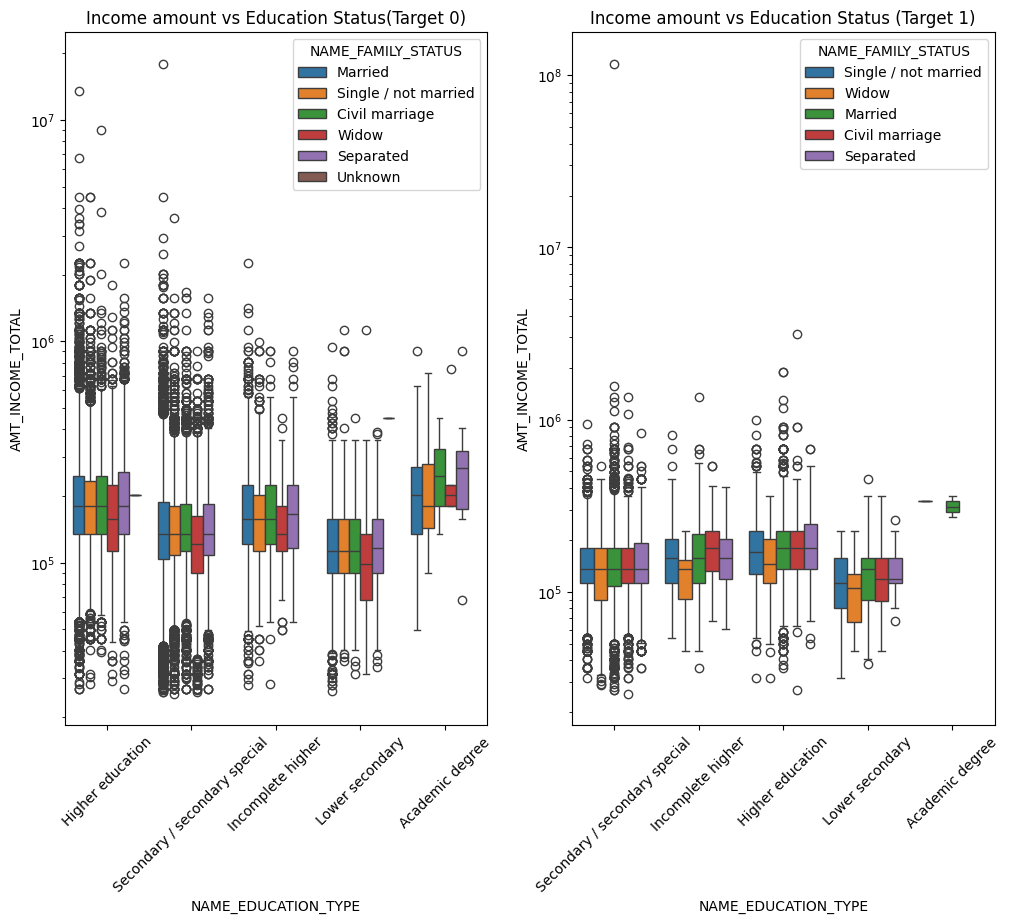

In [215]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(12,9))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =df_target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =df_target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()

>We can see that People with higher education have higher income and don't have difficulties in making loan payment.
>>People with higher education wh havee lesser income are unable to pay the loan. Hence we can conclude that,people with Higher income are most likely to make payments.

Correlation between different variables for both dataframes w.r.t. target variables

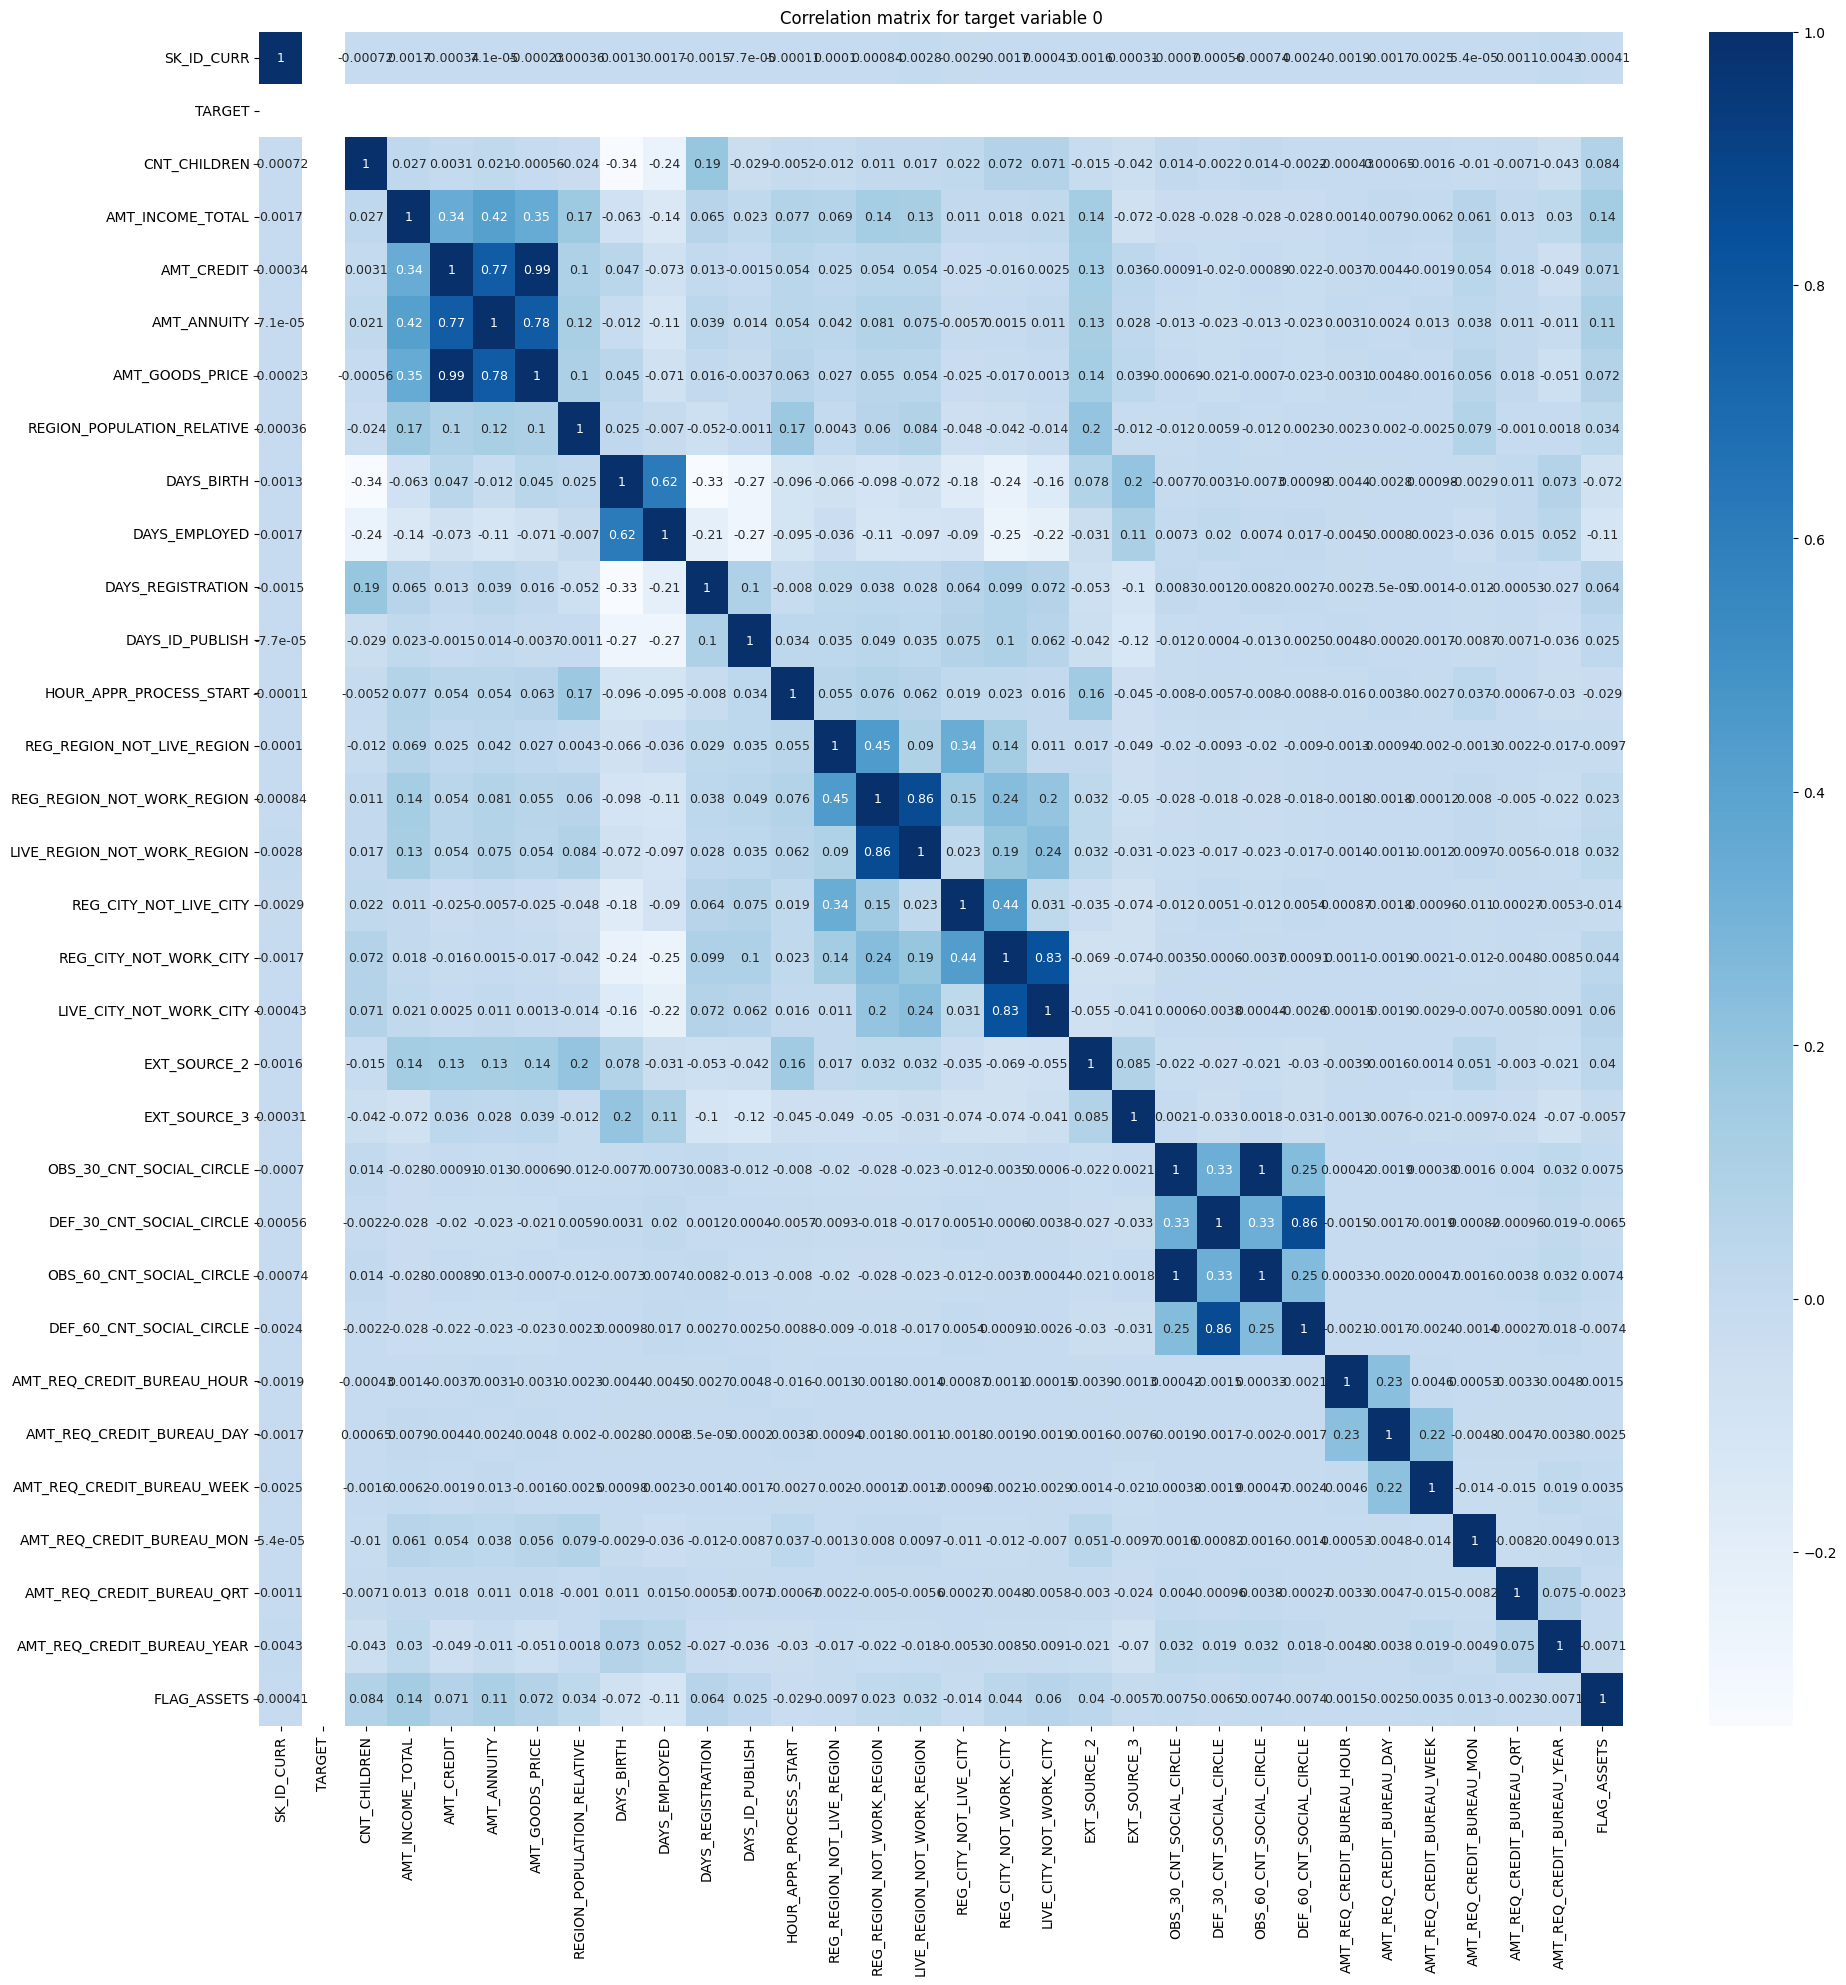

In [225]:
#The heatmap will display correlations between the numeric variables, with annotations and a color map (Blues).
# Select only numeric columns
numeric_columns = df_target_0.select_dtypes(include=['number']).columns
df_numeric = df_target_0[numeric_columns]

# Plotting correlation heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(df_numeric.corr(), annot=True, annot_kws={"size":9}, cmap="Blues")
plt.title('Correlation matrix for target variable 0')
plt.show()

>There is an inverse relationship between credit amount and age (DAYS_BIRTH), indicating younger clients are more likely to have higher credit amounts.
>>Credit amounts tend to be higher for clients with fewer children, suggesting a negative correlation.
>>>There’s an inverse relationship between income amount and the number of children, implying higher incomes for clients with fewer children.
>>>>Clients in densely populated areas tend to have fewer children, as indicated by the negative correlation between REGION_POPULATION_RELATIVE and the number of children.
>>>>>The correlation shows that credit amounts are generally higher in densely populated areas, suggesting more credit activity in these regions.
>>>>>>Income tends to be higher in densely populated areas, aligning with economic opportunities often available in such locations.


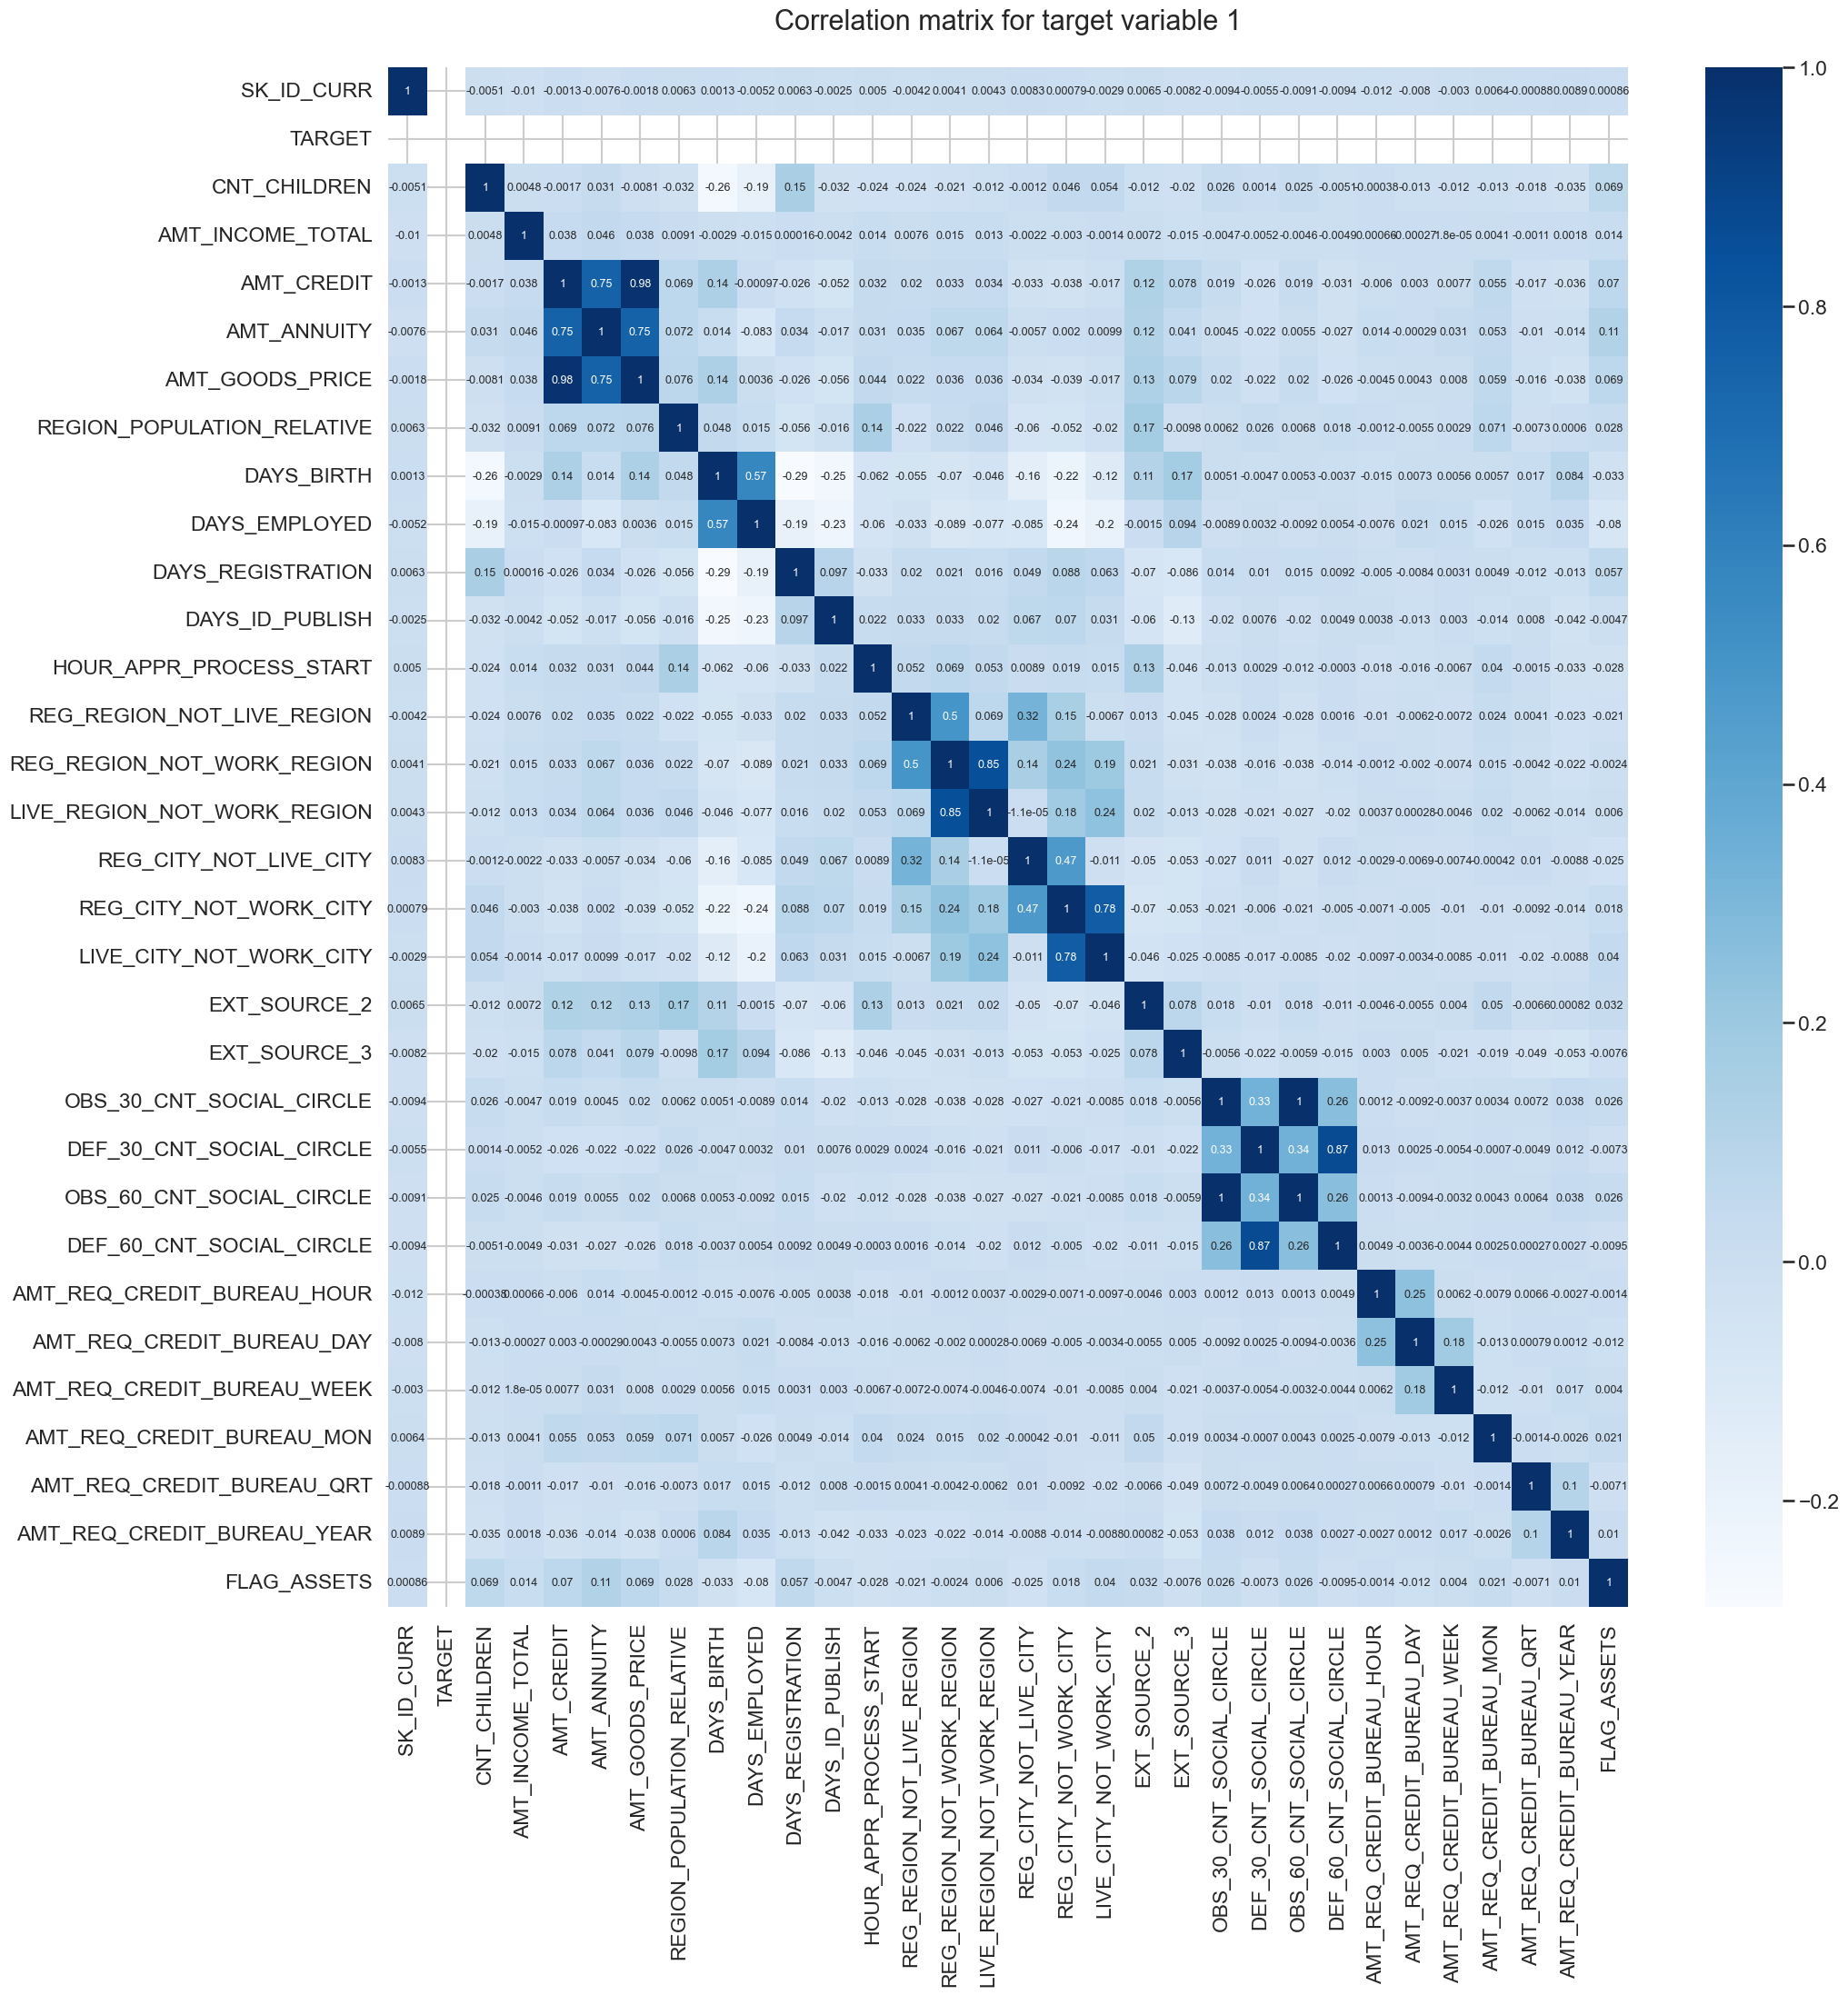

In [275]:
# Select only numeric columns from df_target_1
numeric_columns = df_target_1.select_dtypes(include=['number']).columns
df_numeric = df_target_1[numeric_columns]

# Plotting correlation heatmap for numeric columns only
plt.figure(figsize=(22, 22))
sns.heatmap(df_numeric.corr(), annot=True, annot_kws={"size":9}, cmap="Blues")
plt.title('Correlation matrix for target variable 1')
plt.show()

The heatmap for Target 1 reflects similar observations as target 0

In [229]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [231]:
previous_application.shape

(1670214, 37)

In [233]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [234]:
# columns with high missing percentage i.e >=40%
#Percentage of missing values in all columns 
null_count=round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)
null_count

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [235]:
# columns with high missing percentage i.e >=40%
null_count = null_count[null_count>=40.00]
null_count

AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [237]:
# Removing the columns having high percentage of null values
null_cols=([null_count[null_count >=40.00].index])
previous_application.drop(labels=null_cols[0],axis=1,inplace=True)
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  NAME_CLIENT_TYPE  \
0                       15                           Y  ...          Repeater   
1                       11                           Y  ...          Repeater   
2                       11                           Y  ...          Repeater   
3                        7                           Y  ...          Repeater   
4                        9                           Y  ...          Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0              Mobile            POS                XNA   
1                 XNA           Cash             x-sell   
2                 XNA           Cash             x-sell   
3                 XNA           Cash             x-sell   
4                 XNA           Cash            walk-in   

              CHANNEL_TYPE SELLERPLACE_AREA NAME_SELLER_INDUSTRY CNT_PAYMENT  \
0             Country-wide               35         Connectivity        12.0   
1           Contact center               -1                  XNA        36.0   
2  Credit and cash offices               -1                  XNA        12.0   
3  Credit and cash offices               -1                  XNA        12.0   
4  Credit and cash offices               -1                  XNA        24.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0           middle  POS mobile with interest  
1       low_action          Cash X-Sell: low  
2             high         Cash X-Sell: high  
3           middle       Cash X-Sell: middle  
4             high         Cash Street: high  

[5 rows x 26 columns]

In [238]:
previous_application.shape

(1670214, 26)

In [239]:
# Percentage of missing values after removing the above columns
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

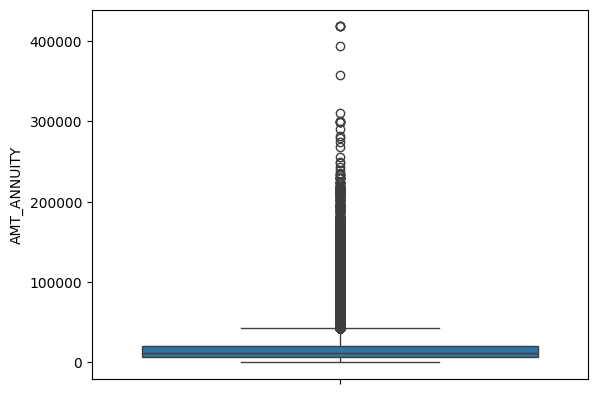

In [244]:
# Let's plot a boxplot to get the outliers

sns.boxplot(previous_application.AMT_ANNUITY);

AMT_ANNUITY has higher percent of nul values We can observe that this column has an outlier which is very large imputing with average would not be appropriate in this case hence let's impute the missing values with median.

In [247]:
median_value = previous_application['AMT_ANNUITY'].median()

In [248]:

previous_application.loc[previous_application['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']= median_value
previous_application.AMT_ANNUITY.isnull().sum()

0

In [249]:
# Removing the column values of 'XNA' and 'XAP'

previous_application=previous_application.drop(previous_application[previous_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_application=previous_application.drop(previous_application[previous_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_application=previous_application.drop(previous_application[previous_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [250]:
# Merging the previous application datase with the current application dataset
# Merging the previous application dataset with the current application dataset
merged_df = pd.merge(application_data, previous_application, how='inner', on='SK_ID_CURR', suffixes=('_app', '_prev'))


In [251]:
# Displaying the dataframe 
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_app CODE_GENDER FLAG_OWN_CAR  \
0      100034       0        Revolving loans           M            N   
1      100035       0             Cash loans           F            N   
2      100039       0             Cash loans           M            Y   
3      100046       0        Revolving loans           M            Y   
4      100046       0        Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_app  \
0               Y             0           90000.0        180000.0   
1               Y             0          292500.0        665892.0   
2               N             1          360000.0        733315.5   
3               Y             0          180000.0        540000.0   
4               Y             0          180000.0        540000.0   

   AMT_ANNUITY_app  ...  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0           9000.0  ...               New                 XNA           Cash   
1          24592.5  ...          Repeater                 XNA           Cash   
2          39069.0  ...         Refreshed                 XNA           Cash   
3          27000.0  ...               New                 XNA           Cash   
4          27000.0  ...          Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE                CHANNEL_TYPE SELLERPLACE_AREA  \
0           walk-in     Credit and cash offices               -1   
1           walk-in     Credit and cash offices               -1   
2           walk-in  Channel of corporate sales               -1   
3           walk-in     Credit and cash offices               -1   
4           walk-in     Credit and cash offices               -1   

   NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  PRODUCT_COMBINATION  
0                   XNA          6.0              high    Cash Street: high  
1                   XNA         60.0        low_action     Cash Street: low  
2                   XNA         42.0        low_normal     Cash Street: low  
3                   XNA         18.0        low_normal     Cash Street: low  
4                   XNA         24.0        low_normal     Cash Street: low  

[5 rows x 71 columns]

In [252]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59413 entries, 0 to 59412
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SK_ID_CURR                       59413 non-null  int64   
 1   TARGET                           59413 non-null  int64   
 2   NAME_CONTRACT_TYPE_app           59413 non-null  object  
 3   CODE_GENDER                      59413 non-null  object  
 4   FLAG_OWN_CAR                     59413 non-null  object  
 5   FLAG_OWN_REALTY                  59413 non-null  object  
 6   CNT_CHILDREN                     59413 non-null  int64   
 7   AMT_INCOME_TOTAL                 59413 non-null  float64 
 8   AMT_CREDIT_app                   59413 non-null  float64 
 9   AMT_ANNUITY_app                  59413 non-null  float64 
 10  AMT_GOODS_PRICE_app              59413 non-null  float64 
 11  NAME_TYPE_SUITE                  59413 non-null  object  
 12  NAME

In [253]:
# Removing unwanted columns
merged_df.drop(['SK_ID_CURR', 'REG_REGION_NOT_LIVE_REGION', 
                'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT',
                'NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

# Displaying the dataframe after dropping columns
merged_df.head()

TARGET NAME_CONTRACT_TYPE_app CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0        Revolving loans           M            N               Y   
1       0             Cash loans           F            N               Y   
2       0             Cash loans           M            Y               N   
3       0        Revolving loans           M            Y               Y   
4       0        Revolving loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_app  AMT_ANNUITY_app  \
0             0           90000.0        180000.0           9000.0   
1             0          292500.0        665892.0          24592.5   
2             1          360000.0        733315.5          39069.0   
3             0          180000.0        540000.0          27000.0   
4             0          180000.0        540000.0          27000.0   

   AMT_GOODS_PRICE_app  ... NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0             180000.0  ...              New                 XNA   
1             477000.0  ...         Repeater                 XNA   
2             679500.0  ...        Refreshed                 XNA   
3             540000.0  ...              New                 XNA   
4             540000.0  ...         Repeater                 XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE                CHANNEL_TYPE  \
0           Cash           walk-in     Credit and cash offices   
1           Cash           walk-in     Credit and cash offices   
2           Cash           walk-in  Channel of corporate sales   
3           Cash           walk-in     Credit and cash offices   
4           Cash           walk-in     Credit and cash offices   

   SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                -1                   XNA          6.0              high   
1                -1                   XNA         60.0        low_action   
2                -1                   XNA         42.0        low_normal   
3                -1                   XNA         18.0        low_normal   
4                -1                   XNA         24.0        low_normal   

   PRODUCT_COMBINATION  
0    Cash Street: high  
1     Cash Street: low  
2     Cash Street: low  
3     Cash Street: low  
4     Cash Street: low  

[5 rows x 62 columns]

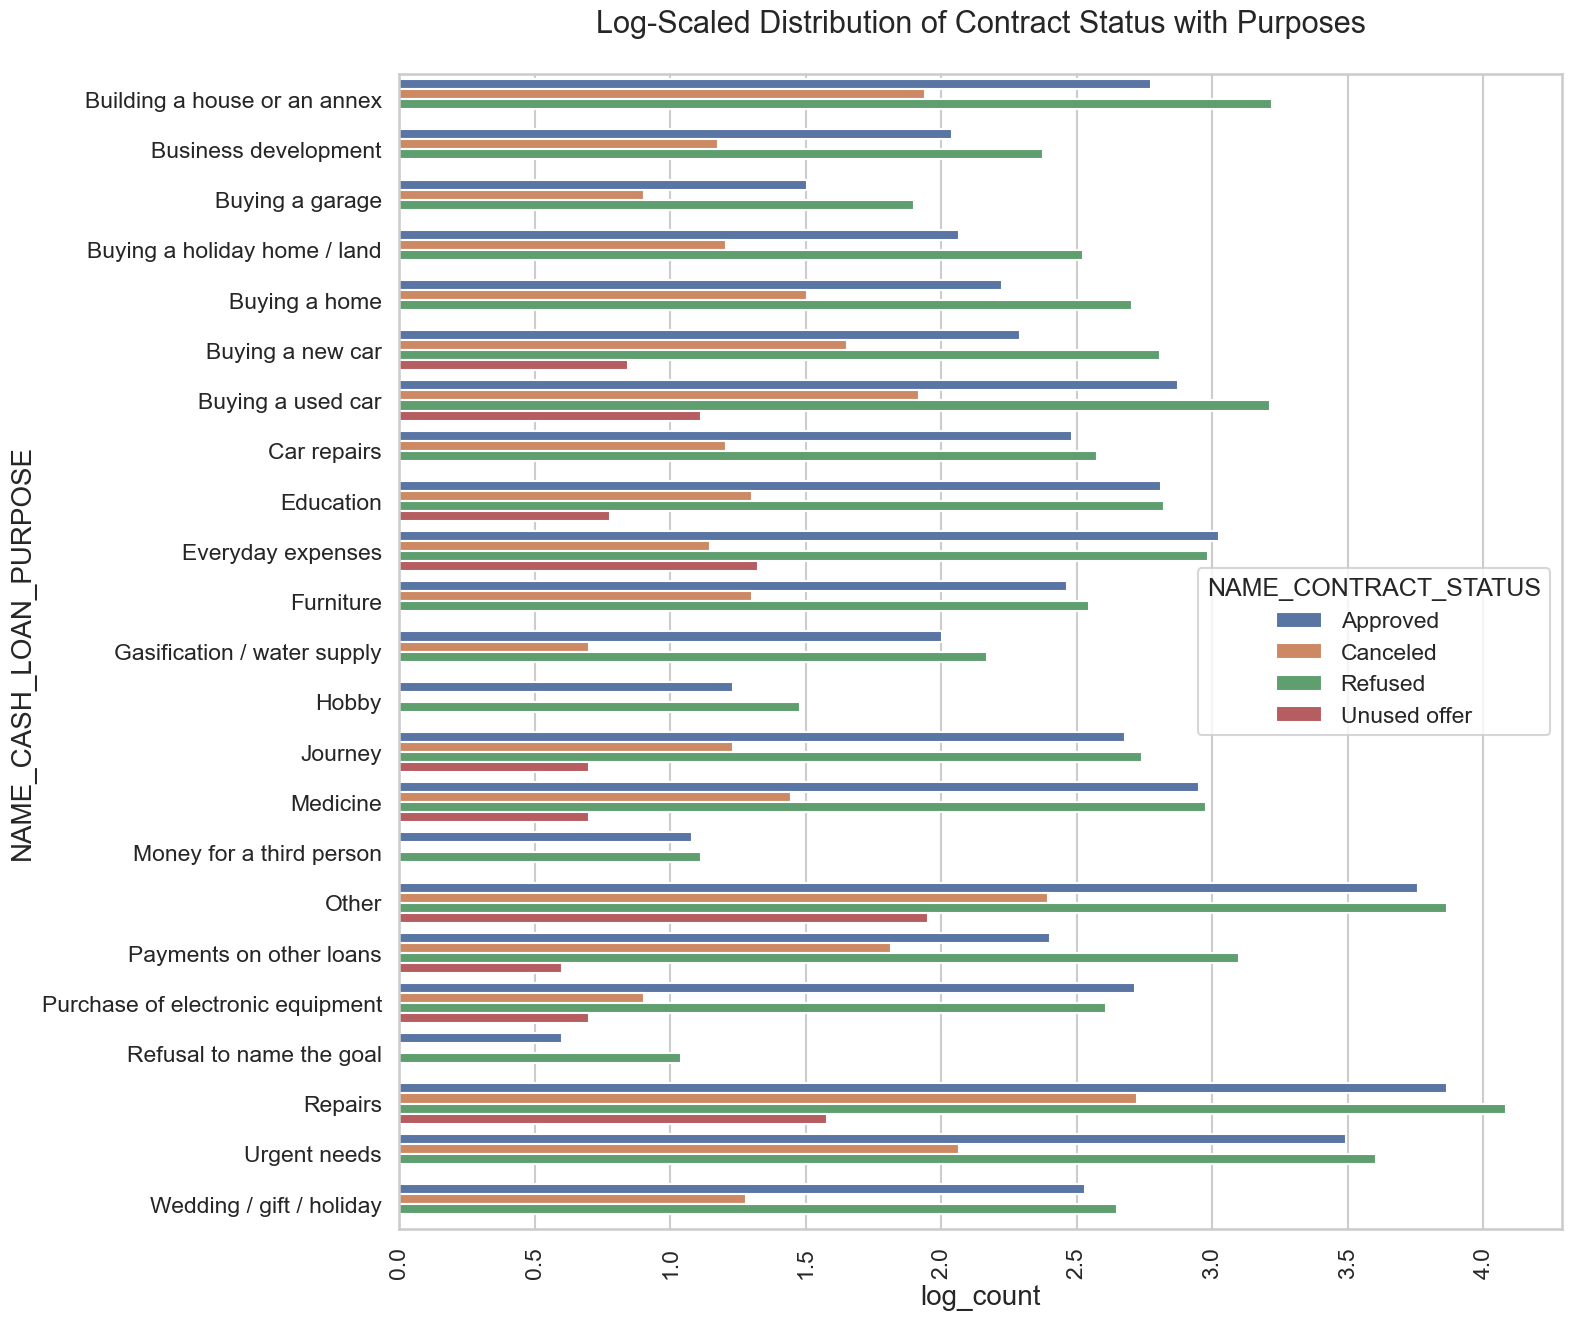

In [283]:

# Calculate the counts
contract_status_counts = merged_df.groupby(['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS']).size().unstack(fill_value=0)

# Apply log transformation to the counts
log_counts = np.log10(contract_status_counts + 1)

# Reset index for plotting
log_counts = log_counts.reset_index()

# Plotting the transformed counts
plt.figure(figsize=(15, 15))
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.title('Log-Scaled Distribution of Contract Status with Purposes')

ax = sns.barplot(data=log_counts.melt(id_vars='NAME_CASH_LOAN_PURPOSE', var_name='NAME_CONTRACT_STATUS', value_name='log_count'),
                 y='NAME_CASH_LOAN_PURPOSE', x='log_count', hue='NAME_CONTRACT_STATUS', palette='deep')
plt.show()


>Most rejection of loans came from purpose 'Repairs'.
>>For education purposes we can see equal number of approves and rejection.
>>>Purchase of Electronic equipment has higher approved than rejection.

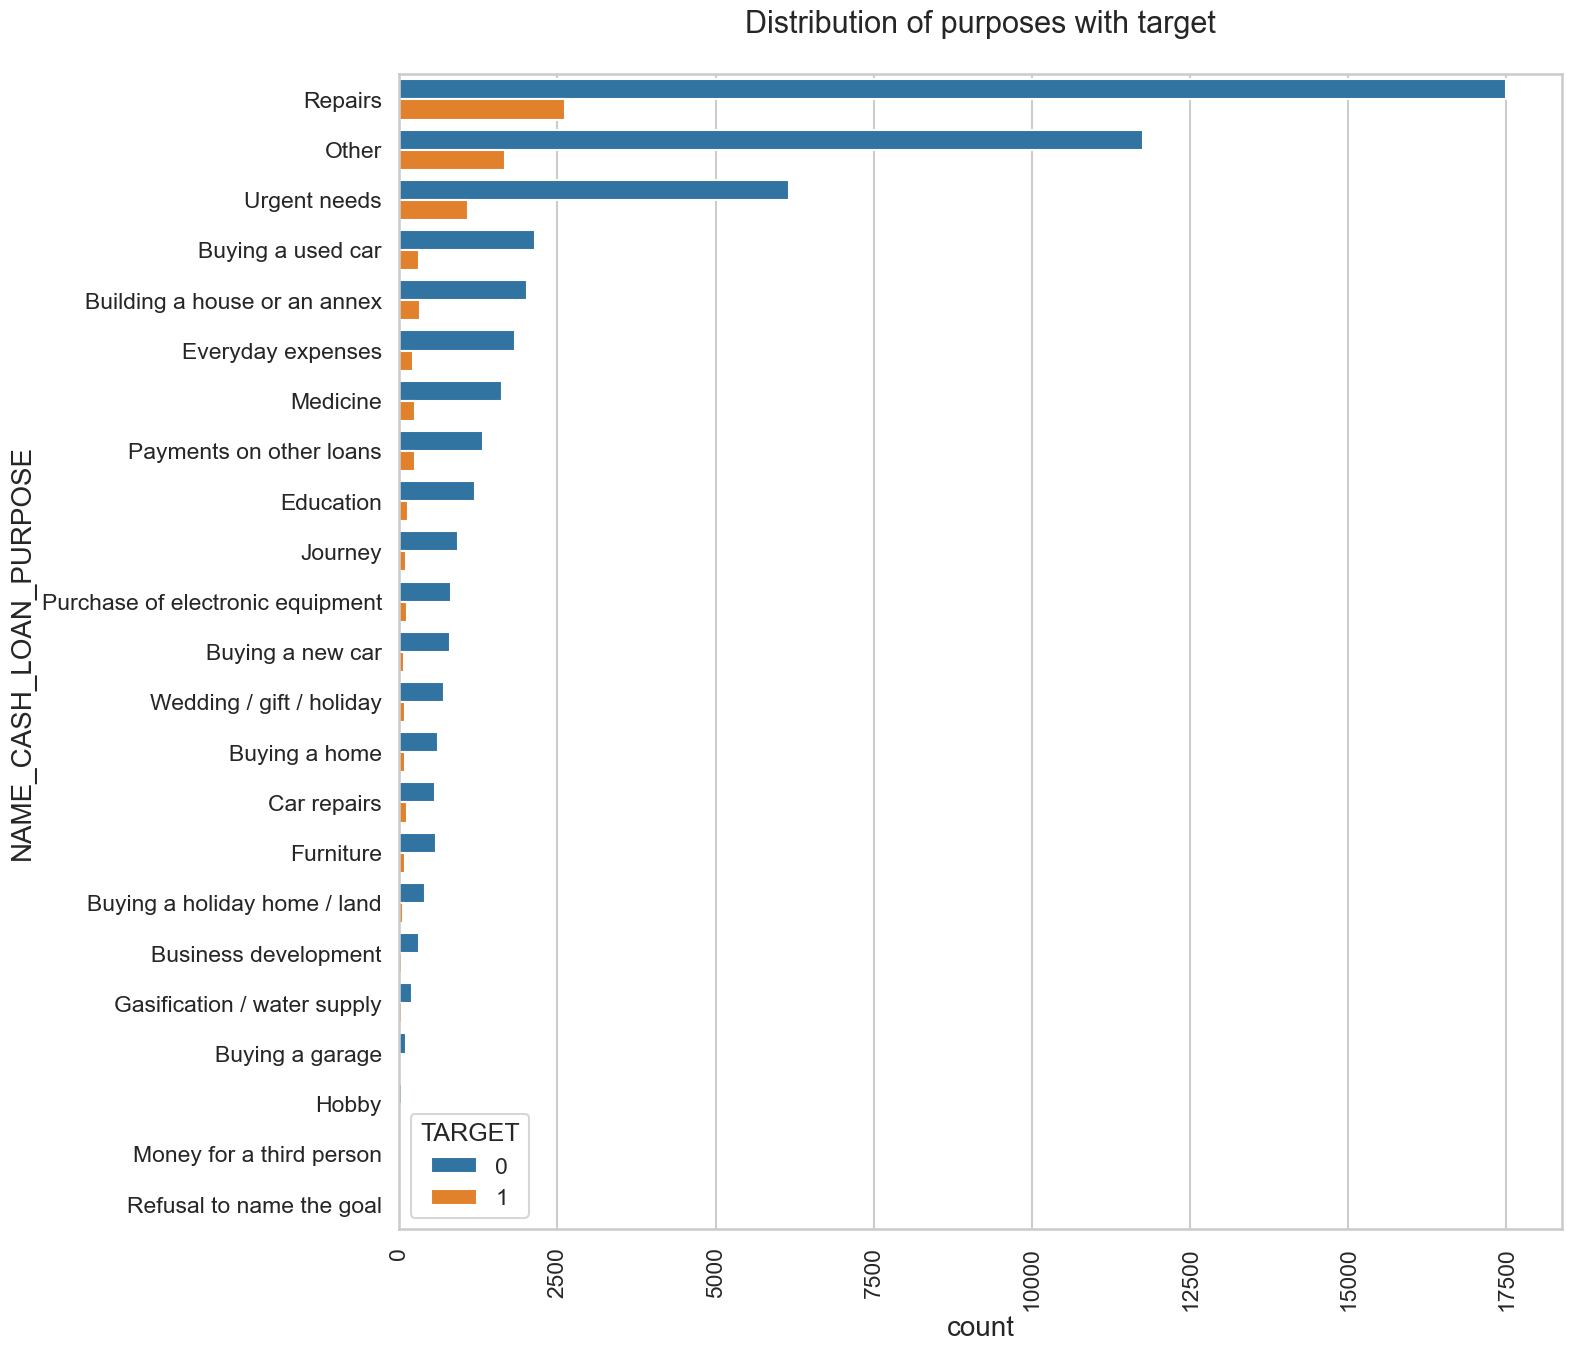

In [259]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.title('Distribution of purposes with target')

ax = sns.countplot(data=merged_df, y='NAME_CASH_LOAN_PURPOSE', 
                   order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index, 
                   hue='TARGET')
plt.show()


Loan purposes with 'Repairs' are facing more difficulites in payment on time. loan payment is significant higher than facing difficulties.

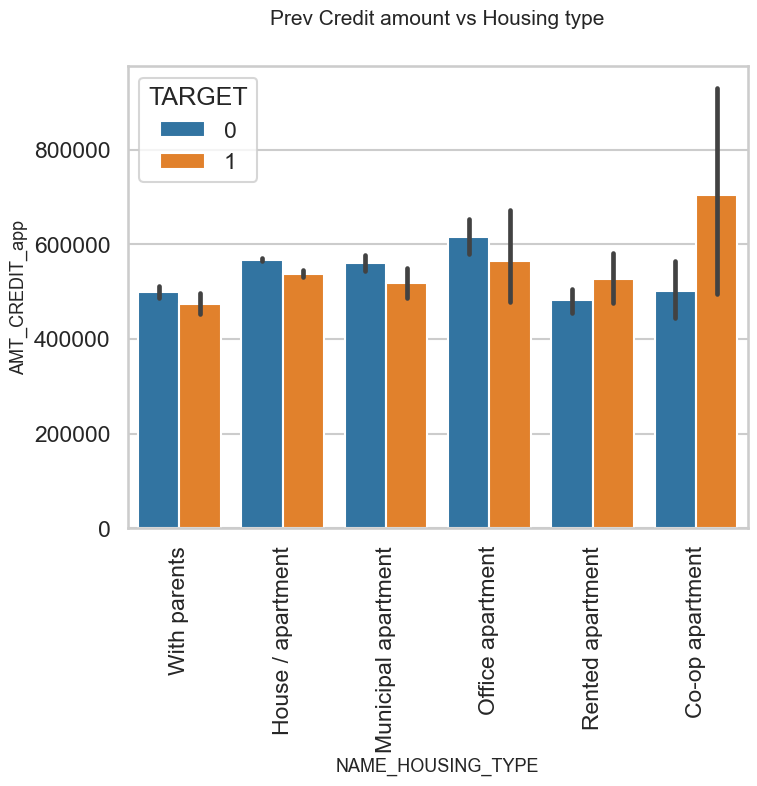

In [268]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale
# Apply logarithmic transformation to the AMT_CREDIT column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.barplot(data=merged_df, y='AMT_CREDIT_app', hue='TARGET', x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type', fontsize=15)
plt.xlabel('NAME_HOUSING_TYPE', fontsize=13)
plt.ylabel('AMT_CREDIT_app', fontsize=13)
plt.show()


We can see that office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1 bank should avoid giving loans to the housing type of co-op apartment.

CONCLUSIONS
>The loan purpose ‘Repair’ is having higher number of unsuccessful payments on time hence bank should avoid giving loan for this.

>>Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

>>>Pensioners & people with Higher income are most likely to make payments.
    
>>>>People with housing type ‘With parents’ can be targeted as they are having least number of unsuccessful payments.